# <font color='blue'>Assignment: MSE-vs-MAE</font>

In the lecture, we have seen that `Mean Absolute Error` (`MAE`) is more robust to outlier compare to `Mean Square Error` (`MSE`). In this assignment, we have to be a witness to this theory. 

Although we have an intuition that it is bound to happen because the cost of outliers is much more in `MSE` compare to `MAE`. Let's implement and witness it. 

**In this assignment, you have to implement the following:**

- `Mean Square Error (MSE)`


- `Mean Absolute Error (MAE)`


- The gradient with respect to `m` and `c`, when the loss function is `MSE`


- The gradient with respect to `m` and `c`, when the loss function is `MAE`

Codes for training and visualization is already in the notebook.

## <font color='blue'>Marking Scheme</font>

#### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Mean Square Error (MSE)</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Mean Absolute Error (MAE)</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Gradients for MSE</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Gradients for MAE</h3></td> <td><h3>10</h3></td> </tr>
    </table>
</div>


In [1]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [9]:
import torch
import matplotlib.pyplot as plt

from collections import defaultdict


plt.style.use('ggplot')

torch.manual_seed(0)

In [3]:
plt.rcParams["figure.figsize"] = (15, 8)

# <font style="color:green">1. Generate Data </font>
We will generate 1000 data points for the experiment. The `x-axis` is the independent variable which has values randomly distributed between -5 to 5. We assume some values for m and c to create the data points for the dependent variable ( `y-axis` ). We also add some randomness so that the y values are different for the same x. 

Now, we have a simple dataset which has been generated using a linear model in the presence of noise. We have also converted five percent of data into outliers to observe the performance difference between MSE and MAE at the time of training. The data has been dispayed using the scatter plot.

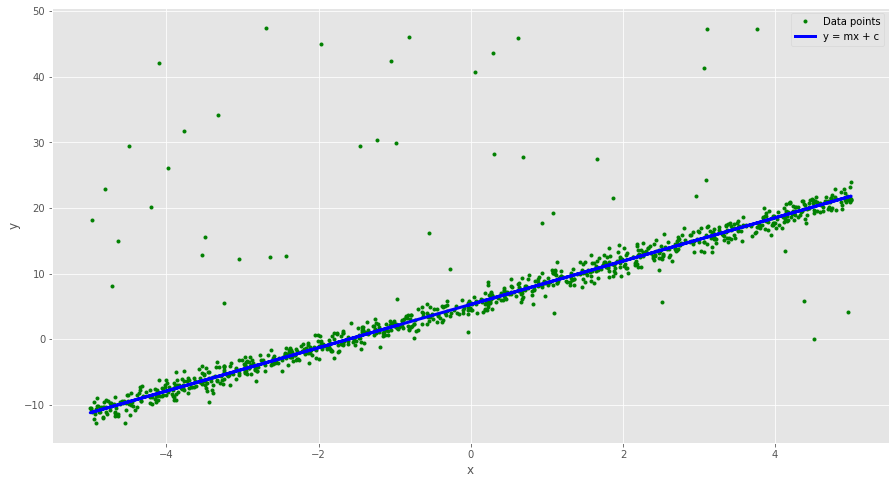

In [4]:
# Generating y = mx + c + random noise
num_data = 1000

# True values of m and c
m_line = 3.3
c_line = 5.3

# input (Generate random data between [-5,5])
x = 10 * torch.rand(num_data) - 5

# Output (Generate data assuming y = mx + c + noise)
y_label = m_line * x + c_line + torch.randn_like(x)

# Add a few outlier
num_outliers = int(0.05 * num_data)
random_index = torch.randint(num_data, (num_outliers,))
y_label[random_index] = 50 * torch.rand(len(random_index))

y = m_line * x + c_line

# Plot the generated data points 
plt.plot(x, y_label, '.', color='g', label="Data points")
plt.plot(x, y, color='b', label='y = mx + c', linewidth=3)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

# <font style="color:green">2. Problem Formulation</font>

The goal is to predict $y$ given some value of $x$. To do this we will fit a line that goes through the data points $(x_i, y_i)$. The equation for such a line is 

$$
y = mx + c
$$

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. i.e., 

$$
y_i = m x_i + c
$$

Unless we have perfect data with no noise, even the best $m$ and $c$ we can find will not perfectly fit the data. So, we will have an **error** or a **residual** given by

$$
e_i = (y_i - m x_i -c) 
$$

We want to find a value of $m$ and $c$ that minimizes the error above. Positive or negative values of error are equally bad for us. So, we are interested in minimizing the square or absolute of the error above. We will see the mean square error (`MSE`) and mean absolute error (`MAE`) and their gradients with respect to m and c. 

# <font style="color:green">3. Loss Functions and their Gradients wrt Learning Parameters.</font>

We need a loss function that can be optimized using gradient descent and updating learnable parameters. Here, we will use two types of loss functions and see which is performing better in the case of outliers in the training data. 


## <font style="color:green">3.1. Mean Square Error (MSE)</font>

**The `mean squared error (MSE)` function which is given by:**

$$
l_{mse} = \frac{1}{N}\sum^N_{i=1}(y_i - m x_i -c)^2 \\
$$

**Take partial derivatives w.r.t `m` and `c` respectively:**

$$
\begin{align}
\frac{\partial l_{mse}}{\partial m}  &= -\frac{2}{N} \sum^N_{i=1} x_i(y_i - m x_i - c) \\
\frac{\partial l_{mse}}{\partial c}  &= -\frac{2}{N} \sum^N_{i=1} (y_i - m x_i - c) \\
\end{align}
$$

To follow the slope of the curve, we need to move `m` in the direction of negative gradient. However, we need to control the rate at which we go down the slope so that we do not overshoot the minimum. So we use a parameter $\lambda$ called the `learning rate`. 

**Update rule of `m` and `c` using gradient descent:**

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l_{mse}}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l_{mse}}{\partial c} \\ 
\end{align}
$$


## <font style="color:green">3.2. Mean Absolute Error (MAE)</font>

**The `mean absolute error (MAE)` function which is given by:**

$$
l_{mae} = \frac{1}{N}\sum^N_{i=1}|y_i - m x_i -c|
$$

**The above function can be re-written as the following:**

$$
l_{mae} = \frac{1}{N}\sum^N_{i=1}sign(y_i - m x_i -c)\cdot (y_i - m x_i -c)\\
$$

Where,

\begin{equation}
  sign(\alpha) =
    \begin{cases}
      1 & \text{if  $\alpha > 0$}\\
      -1 & \text{if  $\alpha < 0$}\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}

**Take partial derivatives w.r.t `m` and `c` respectively:**

$$
\begin{align}
\frac{\partial l_{mae}}{\partial m}  &= \frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot (- x_i) \\
                                     &= -\frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot x_i \\
\frac{\partial l_{mae}}{\partial c}  &= \frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot (-1) \\
                                     &= -\frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c) \\
\end{align}
$$

**Update rule of `m` and `c` using gradient descent:**

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l_{mae}}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l_{mae}}{\partial c} \\ 
\end{align}
$$



# <font style="color:green">4. Implementation</font>

## <font style="color:green">4.1. Mean Square Error (MSE) [5 Points]</font>

In [10]:
def MSE_loss(inputs, label, m, c):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    print(len(label))
    # Mean square error (loss)
    loss = None
    
    ###
    loss = torch.sum((label-m*inputs-c) **2)/len(label)
    ###
    
    return loss
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Mean square error (MSE): 15.95
```

In [11]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

mse_loss = MSE_loss(X, Y, m, c)

print('Mean square error (MSE): {0:.2f}'.format(mse_loss))

3
Mean square error (MSE): 15.95


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.2. Mean Absolute Error (MAE) [5 Points]</font>

In [12]:
def MAE_loss(inputs, label, m, c):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # Mean absolute error (loss)
    loss = None
    
    ###
    loss = torch.sum(torch.abs(label-m*inputs-c))/len(label)
    ###
    
    return loss
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Mean absolute error (MAE): 3.70
```

In [13]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

mae_loss = MAE_loss(X, Y, m, c)

print('Mean absolute error (MAE): {0:.2f}'.format(mae_loss))

Mean absolute error (MAE): 3.70


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.3. Gradients for MSE [10 Points]</font>

In [16]:
def gradient_wrt_m_and_c_mse(inputs, labels, m, c):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    
    # gradient w.r.t to m is g_m 
    g_m = -2 * torch.sum(inputs * (labels- (m* inputs)- c))/len(labels)
    
    # gradient w.r.t to c is g_c
    g_c = -2 * torch.sum(labels- (m* inputs)- c)/len(labels)
    
    ###
    ### YOUR CODE HERE
    ###
    
    return g_m, g_c

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Gradient wrt m (for MSE): -18.66
Gradient wrt c (for MSE): -3.33
```

In [17]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

gm, gc = gradient_wrt_m_and_c_mse(X, Y, m, c)

print('Gradient wrt m (for MSE): {0:.2f}'.format(gm))
print('Gradient wrt c (for MSE): {0:.2f}'.format(gc))    

Gradient wrt m (for MSE): -18.66
Gradient wrt c (for MSE): -3.33


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.4. Gradients for MAE [10 Points]</font>

In [20]:
def gradient_wrt_m_and_c_mae(inputs, labels, m, c):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # gradient w.r.t to m is g_m 
    g_m = -1 * torch.sum(torch.sign(labels-(m*inputs)-c)*inputs)/len(labels)
    
    # gradient w.r.t to c is g_c
    g_c = -1 * torch.sum(torch.sign(labels-(m*inputs)-c))/len(labels)
    
    ###
    ### YOUR CODE HERE
    ###
    
    return g_m, g_c
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Gradient wrt m (for MAE): -2.25
Gradient wrt c (for MAE): -0.33
```

In [21]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

gm, gc = gradient_wrt_m_and_c_mae(X, Y, m, c)

print('Gradient wrt m (for MAE): {0:.2f}'.format(gm))
print('Gradient wrt c (for MAE): {0:.2f}'.format(gc))    

Gradient wrt m (for MAE): -2.25
Gradient wrt c (for MAE): -0.33


In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [24]:
def update_m_and_c(m, c, g_m, g_c, lr):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    g_m = gradient w.r.t to m
    c_m = gradient w.r.t to c
    '''
    updated_m = m -  lr * g_m
    updated_c = c - lr * g_c
    
    return updated_m, updated_c

## <font style="color:green">4.5. Training</font>

**Function for loss plot.**

In [25]:
def plot_loss(loss):
    fig = plt.figure()
    
    plt.subplot(1, 2, 1)
    plt.plot(range(len(loss[0])), loss[0], color='k')
    
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('MSE Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss[1])), loss[1], color='r')
    
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('MAE Loss')
    plt.show()
    
    return

**Function for display intermediate training.**

In [26]:
def display_training(X, Y_origin, Y_label, loss, m, c, iteration):
    print('Iteration: {}, \nLoss_mse: {:.3f}, m_mse: {:.3f}, c_mse: {:.3f}\nLoss_mae: {:.3f}, m_mae: {:.3f},' 
          'c_mae: {:.3f}'.format(iteration, loss[0][-1], m[0], c[0], loss[1][-1], m[1], c[1]))
    
    # Prediction for trained with MSE loss
    y_pred_mse = m[0] * X + c[0]
    
    # Prediction for trained with MAE loss
    y_pred_mae = m[1] * X + c[1]
    
    # plots
    
    # points plot
    plt.plot(X, Y_label, '.', color='g')
    
    # Line for which data is generated
    plt.plot(X, Y_origin, color='b', label='Line corresponding to m={0:.2f}, c={1:.2f}'.
             format(m_line, c_line), linewidth=3)
    
    # Line learned with MSE loss
    plt.plot(X, y_pred_mse, color='k', label='Line corresponding to m_mse={0:.2f}, c_learned={1:.2f}'.
             format(m[0], c[0]), linewidth=3)
    
    # Line learned with MSE loss
    plt.plot(X, y_pred_mae, color='r', label='Line corresponding to m_mae={0:.2f}, c_learned={1:.2f}'.
             format(m[1], c[1]), linewidth=3)
    
    
    plt.title("Iteration : {}".format(iteration))
    plt.legend()

    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()
    
    return

**The training function**

In [27]:
def train(inputs, labels, labels_origin, initial_m, initial_c, grad_fun_m_c_list, loss_fun_list, lr=0.01, 
          batch_size=10, epoch=10, display_count=20):
    
    loss = dict()
    m = dict()
    c = dict()
    
    for i in range(len(grad_fun_m_c_list)):
        loss[i] = []
        m[i] = initial_m
        c[i] = initial_c
        
    num_batches = int(len(inputs)/batch_size)
    
    for i in range(epoch):
        
        shuffle_indices = torch.randint(0, len(inputs), (len(inputs),))
        
        for j in range(num_batches):
            
            X = inputs[shuffle_indices[j*batch_size:j*batch_size+batch_size]]
            Y = labels[shuffle_indices[j*batch_size:j*batch_size+batch_size]]
            
            for k, grad_m_c in enumerate(grad_fun_m_c_list):
                g_m, g_c = grad_m_c(X, Y, m[k], c[k])
                
                m[k], c[k] = update_m_and_c(m[k], c[k], g_m, g_c, lr)
                l = loss_fun_list[k](inputs, labels, m[k], c[k])
                loss[k].append(l)
            
            if j % display_count == 0:
                iteration = i * num_batches + j
                display_training(inputs, labels_origin, labels, loss, m, c, iteration)
                
    final_iteration = (epoch-1) * num_batches + num_batches - 1
                
    return m, c, loss, final_iteration

**Training.**

1000
Iteration: 0, 
Loss_mse: 68.090, m_mse: 2.140, c_mse: 1.049
Loss_mae: 5.733, m_mae: 2.011,c_mae: 1.002


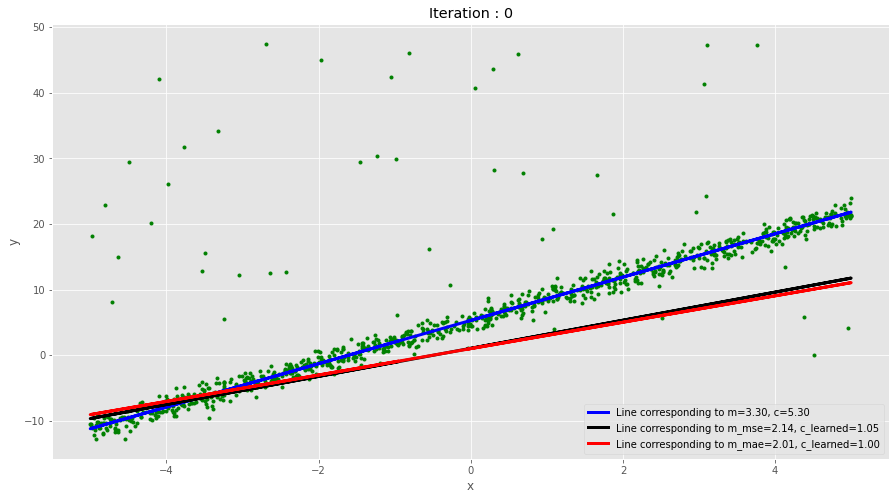

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 40, 
Loss_mse: 44.738, m_mse: 3.020, c_mse: 2.919
Loss_mae: 5.386, m_mae: 2.237,c_mae: 1.151


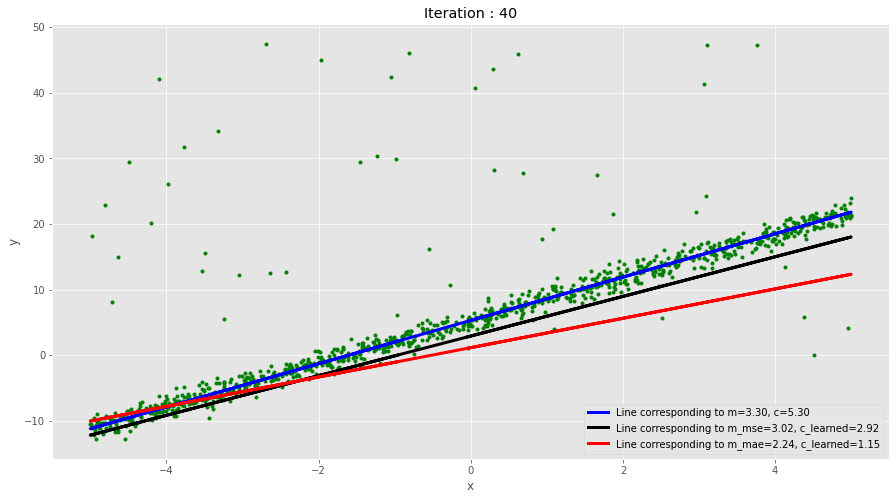

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 80, 
Loss_mse: 38.042, m_mse: 2.841, c_mse: 4.235
Loss_mae: 5.175, m_mae: 2.335,c_mae: 1.315


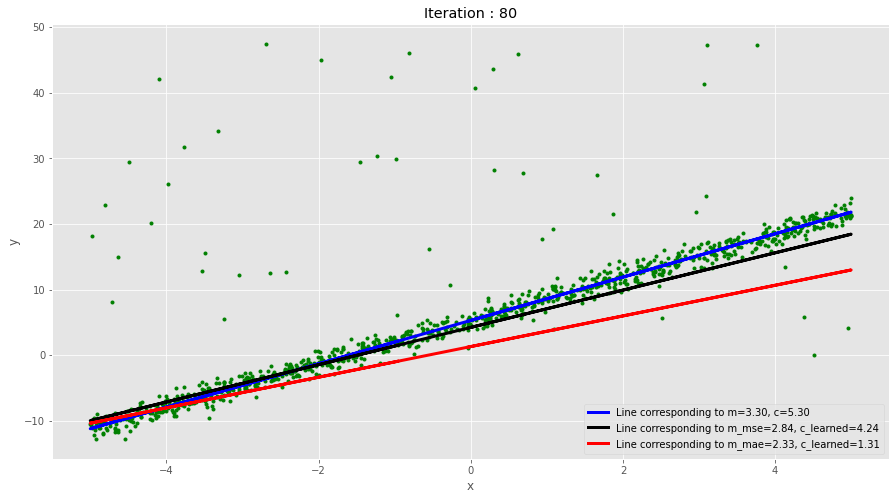

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 100, 
Loss_mse: 36.114, m_mse: 3.032, c_mse: 4.650
Loss_mae: 5.048, m_mae: 2.415,c_mae: 1.403


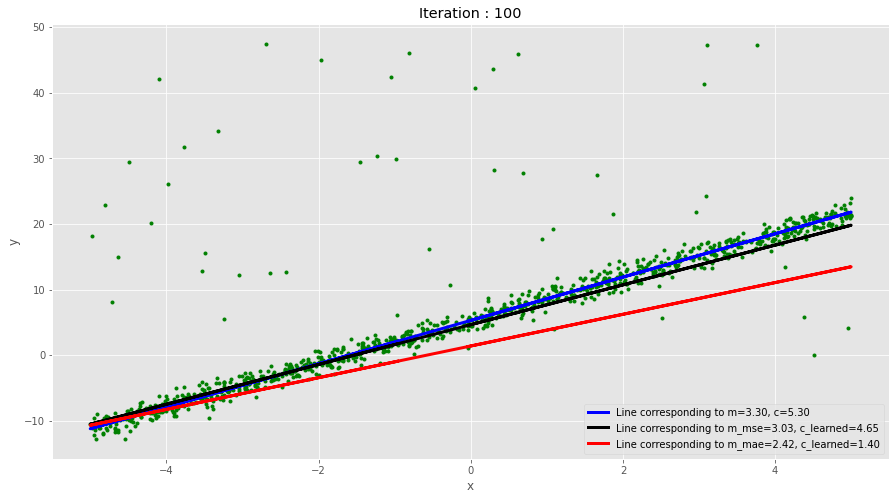

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 140, 
Loss_mse: 35.191, m_mse: 2.809, c_mse: 5.189
Loss_mae: 4.849, m_mae: 2.531,c_mae: 1.568


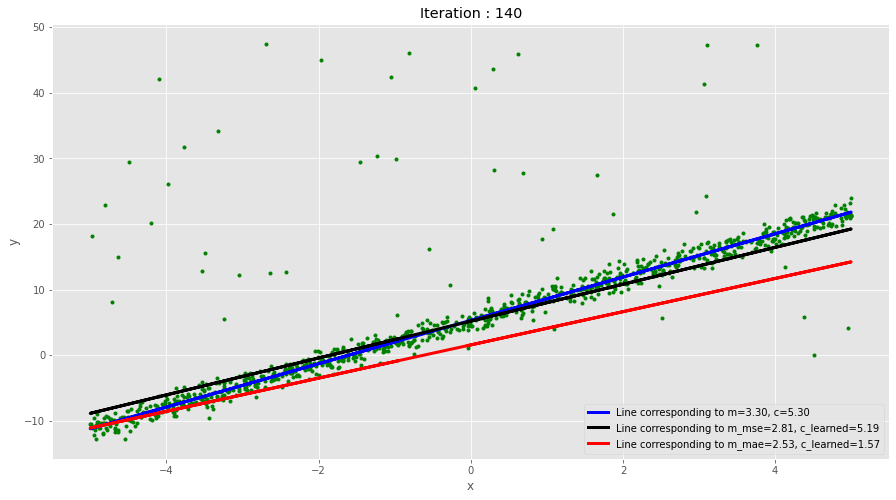

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 180, 
Loss_mse: 34.102, m_mse: 3.138, c_mse: 5.513
Loss_mae: 4.655, m_mae: 2.623,c_mae: 1.749


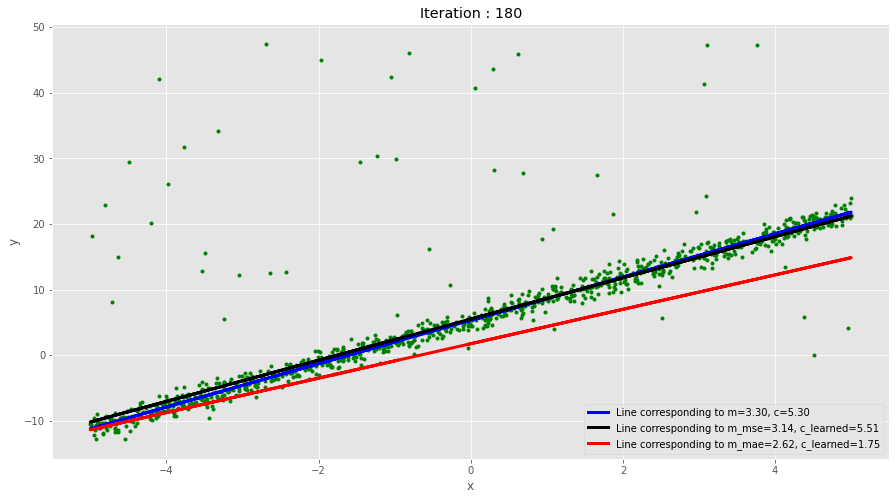

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 200, 
Loss_mse: 33.873, m_mse: 3.073, c_mse: 5.641
Loss_mae: 4.569, m_mae: 2.627,c_mae: 1.842


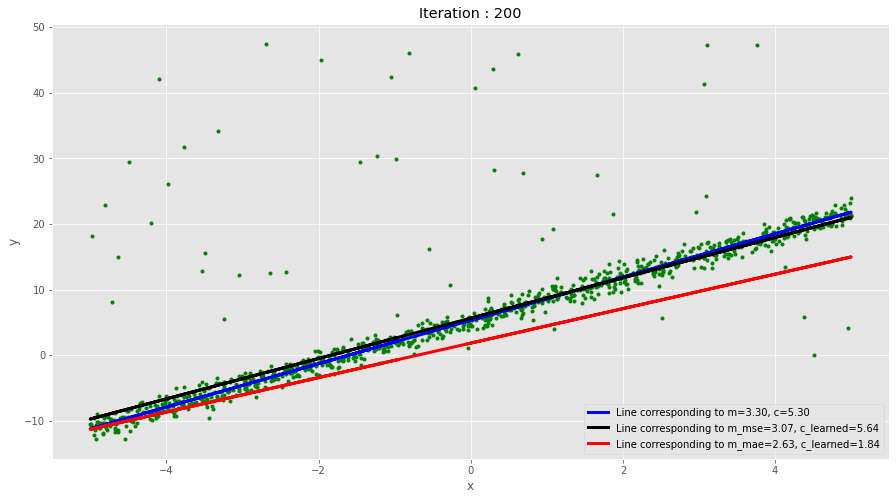

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 240, 
Loss_mse: 33.481, m_mse: 3.032, c_mse: 6.313
Loss_mae: 4.408, m_mae: 2.655,c_mae: 2.011


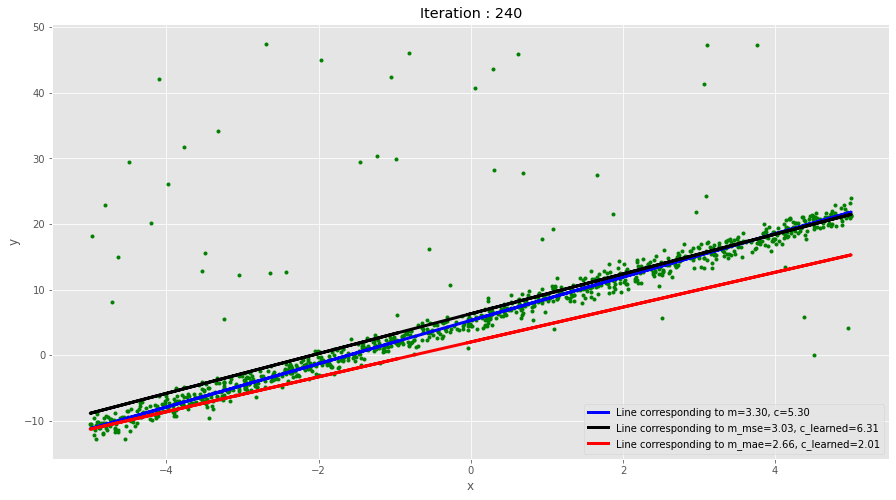

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 280, 
Loss_mse: 33.473, m_mse: 3.066, c_mse: 6.293
Loss_mae: 4.236, m_mae: 2.704,c_mae: 2.184


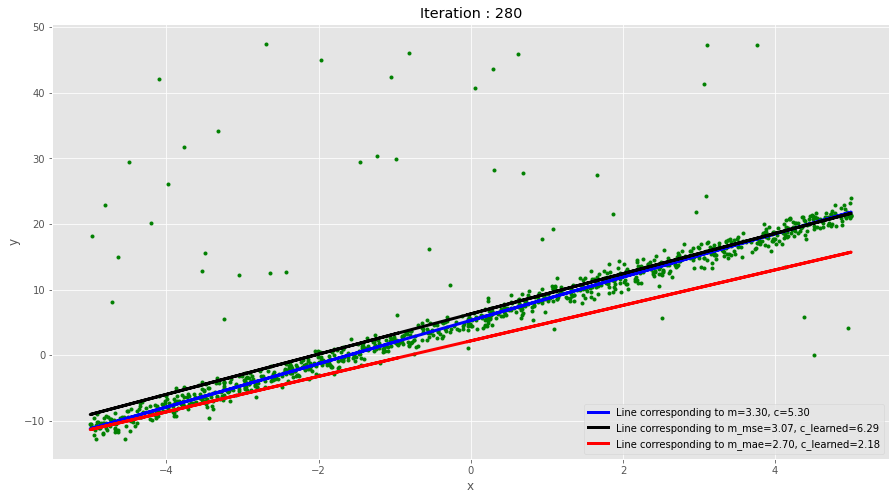

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 300, 
Loss_mse: 33.518, m_mse: 3.011, c_mse: 6.432
Loss_mae: 4.128, m_mae: 2.796,c_mae: 2.273


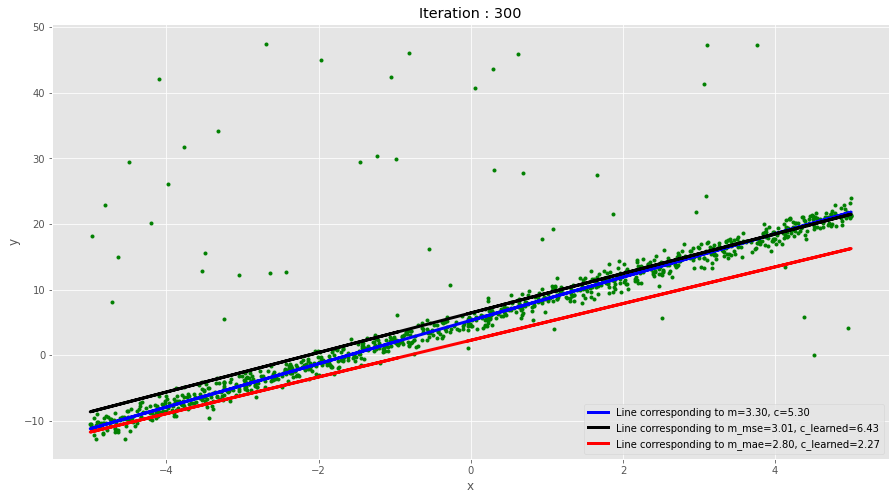

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 340, 
Loss_mse: 33.564, m_mse: 2.959, c_mse: 6.346
Loss_mae: 3.958, m_mae: 2.821,c_mae: 2.453


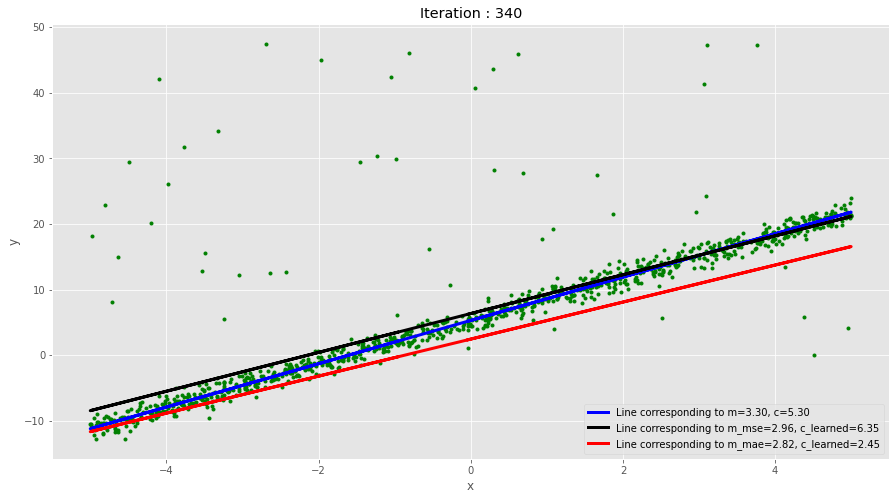

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 380, 
Loss_mse: 33.491, m_mse: 3.105, c_mse: 6.296
Loss_mae: 3.777, m_mae: 2.884,c_mae: 2.634


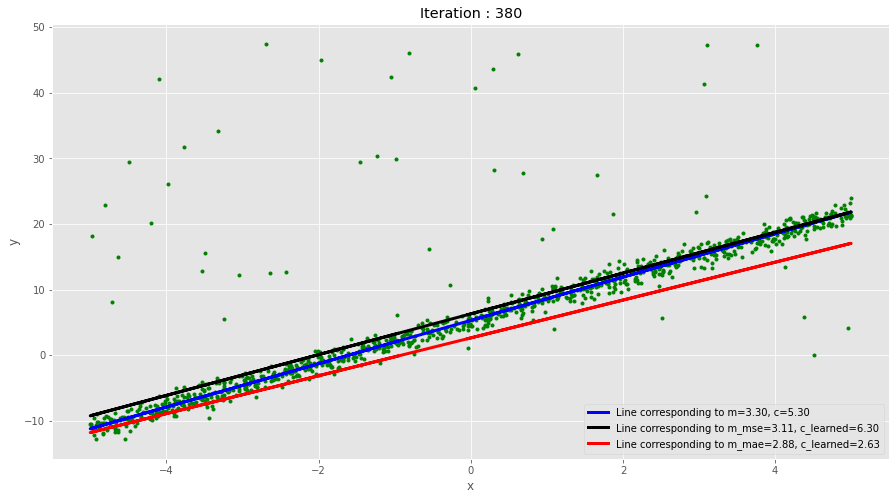

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 400, 
Loss_mse: 33.492, m_mse: 3.094, c_mse: 6.175
Loss_mae: 3.693, m_mae: 2.914,c_mae: 2.718


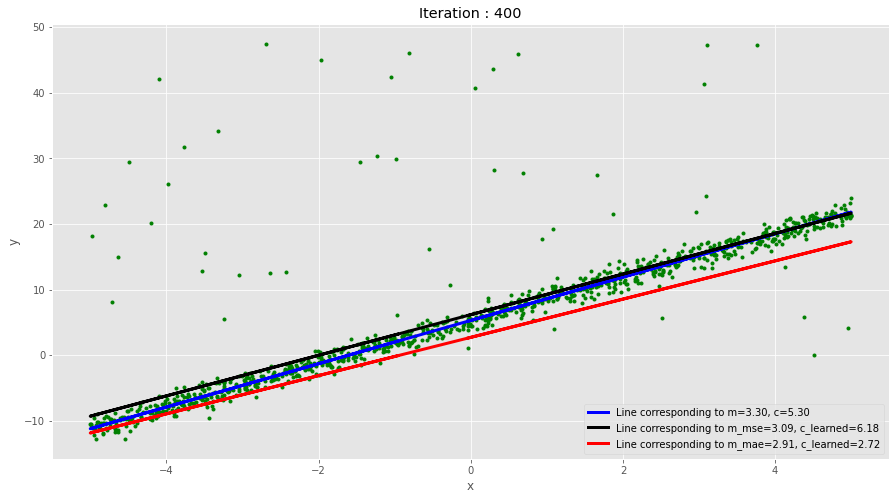

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 440, 
Loss_mse: 33.748, m_mse: 2.881, c_mse: 6.313
Loss_mae: 3.542, m_mae: 2.905,c_mae: 2.888


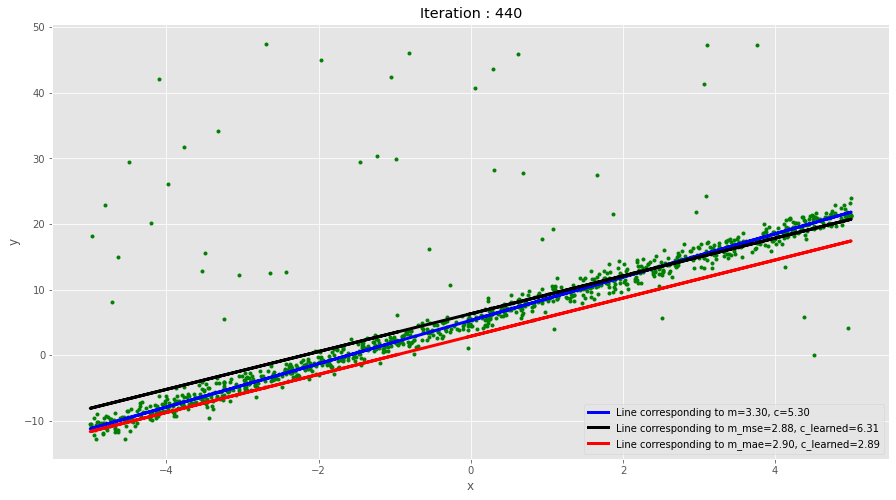

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 480, 
Loss_mse: 33.543, m_mse: 2.988, c_mse: 6.112
Loss_mae: 3.363, m_mae: 2.984,c_mae: 3.061


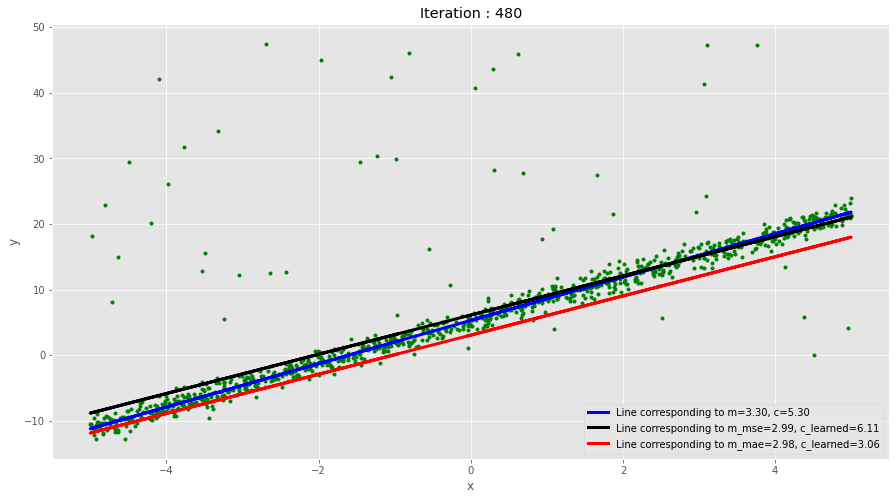

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 500, 
Loss_mse: 33.609, m_mse: 3.185, c_mse: 6.232
Loss_mae: 3.270, m_mae: 3.027,c_mae: 3.153


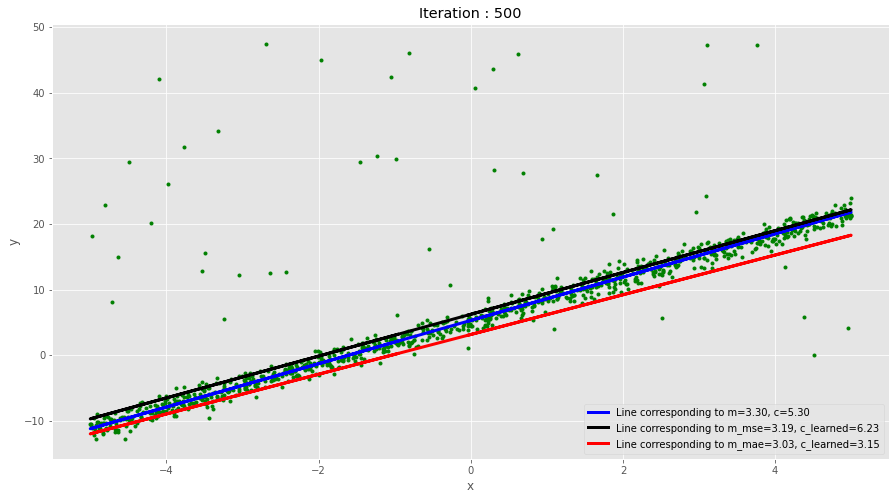

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 540, 
Loss_mse: 33.477, m_mse: 3.042, c_mse: 6.308
Loss_mae: 3.081, m_mae: 3.112,c_mae: 3.339


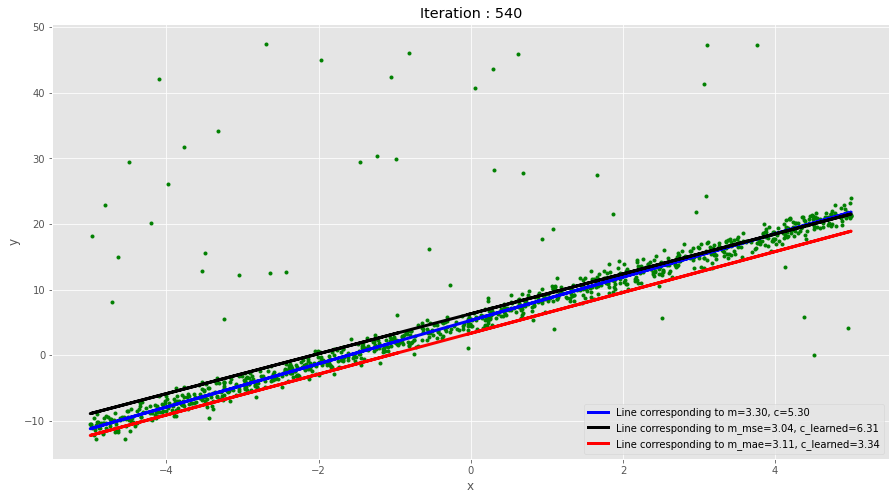

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 580, 
Loss_mse: 33.730, m_mse: 2.892, c_mse: 6.401
Loss_mae: 2.903, m_mae: 3.149,c_mae: 3.527


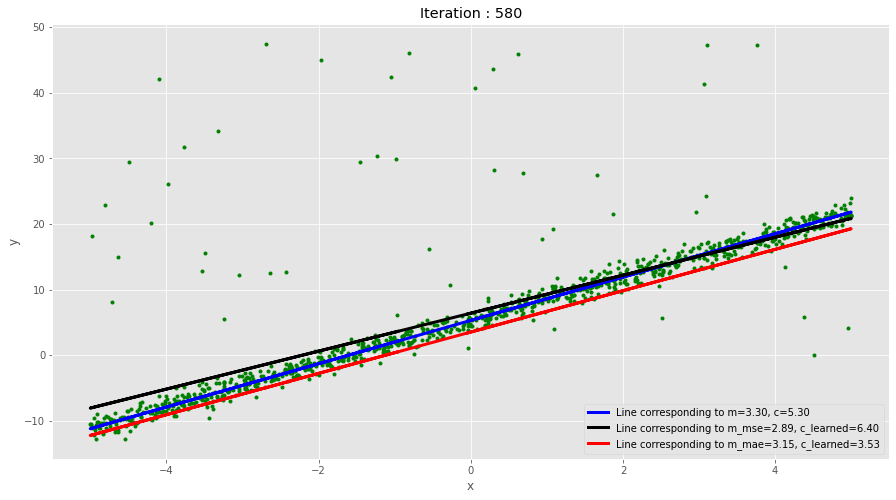

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 600, 
Loss_mse: 33.518, m_mse: 3.130, c_mse: 6.333
Loss_mae: 2.826, m_mae: 3.168,c_mae: 3.610


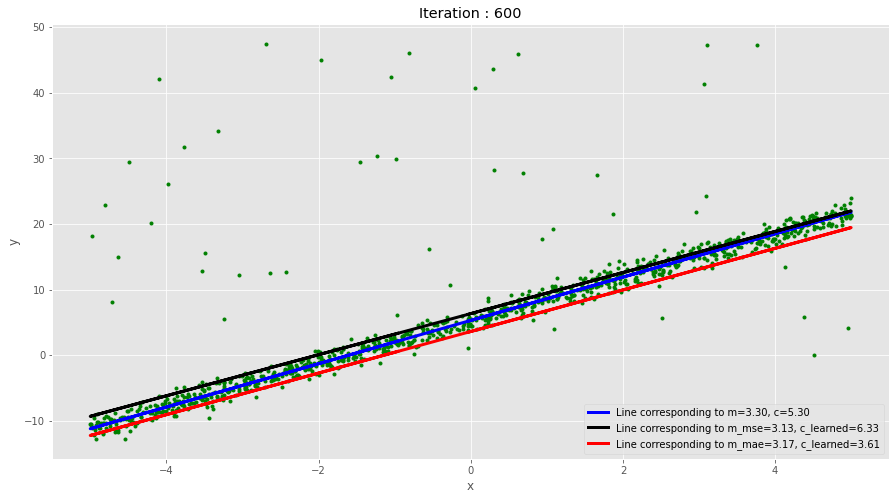

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 640, 
Loss_mse: 33.615, m_mse: 3.187, c_mse: 6.330
Loss_mae: 2.666, m_mae: 3.212,c_mae: 3.784


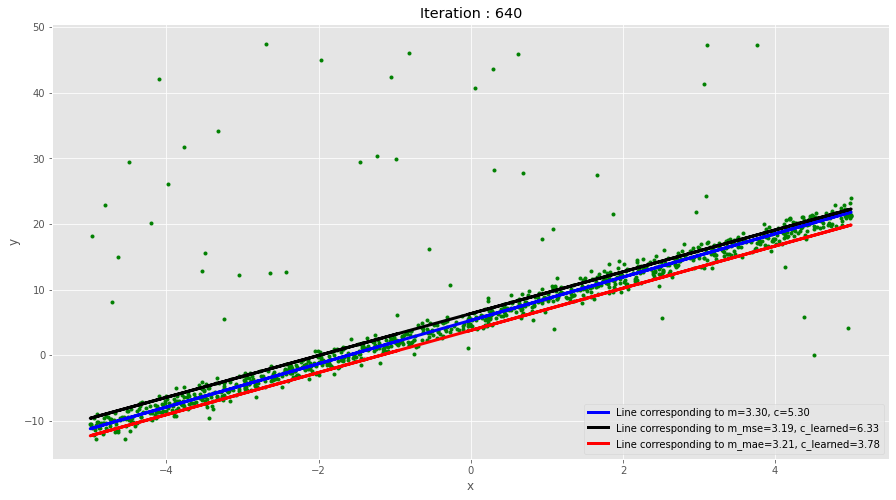

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 680, 
Loss_mse: 33.634, m_mse: 2.939, c_mse: 6.466
Loss_mae: 2.521, m_mae: 3.207,c_mae: 3.957


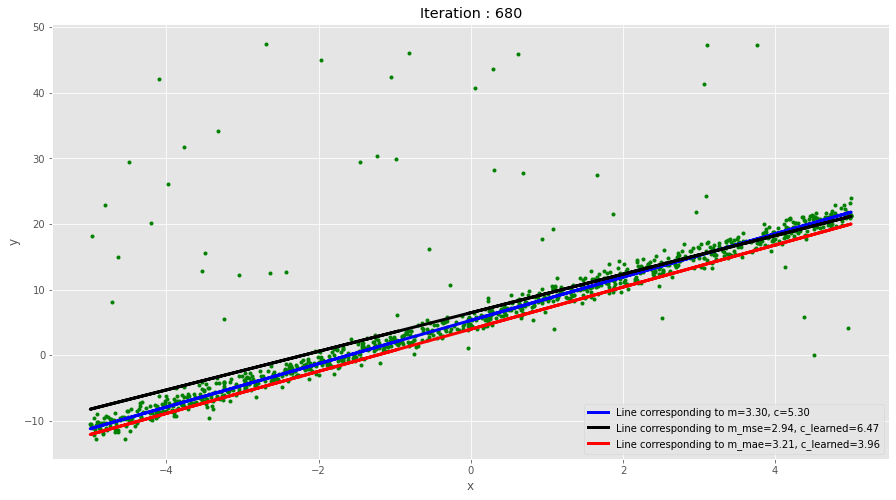

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 700, 
Loss_mse: 33.481, m_mse: 3.082, c_mse: 6.337
Loss_mae: 2.459, m_mae: 3.193,c_mae: 4.038


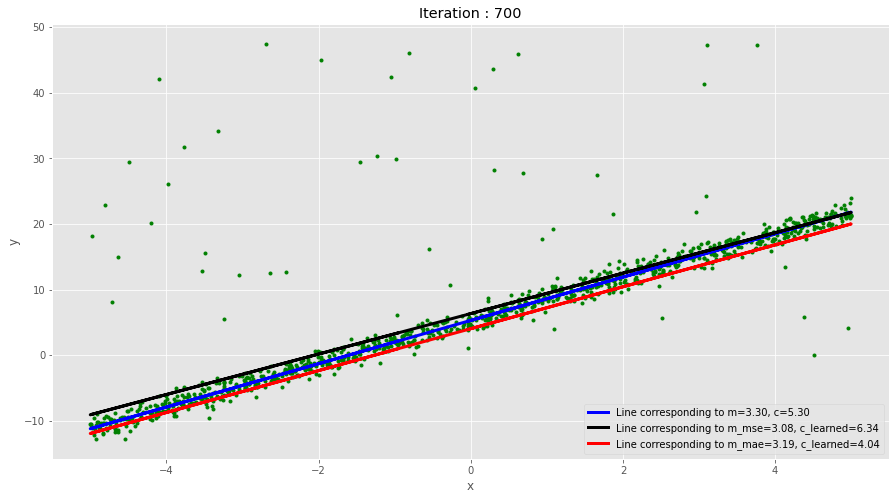

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 740, 
Loss_mse: 33.724, m_mse: 2.913, c_mse: 6.532
Loss_mae: 2.334, m_mae: 3.201,c_mae: 4.196


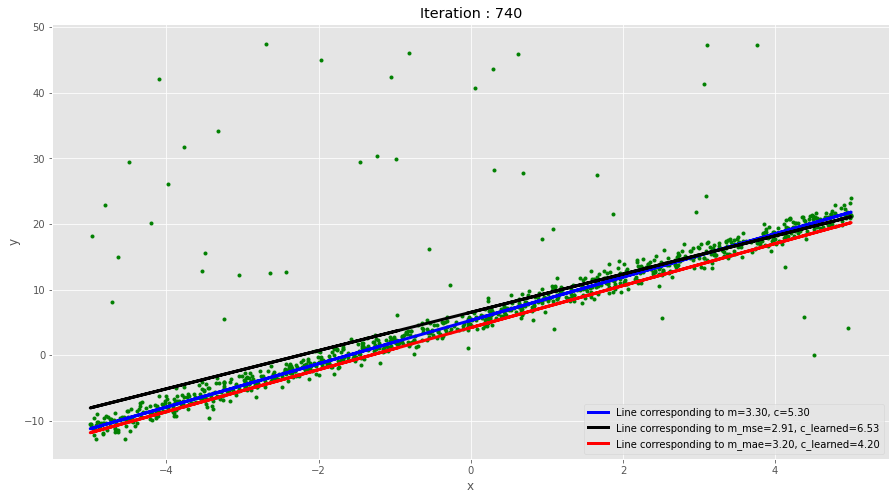

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 780, 
Loss_mse: 33.501, m_mse: 3.080, c_mse: 6.431
Loss_mae: 2.223, m_mae: 3.241,c_mae: 4.338


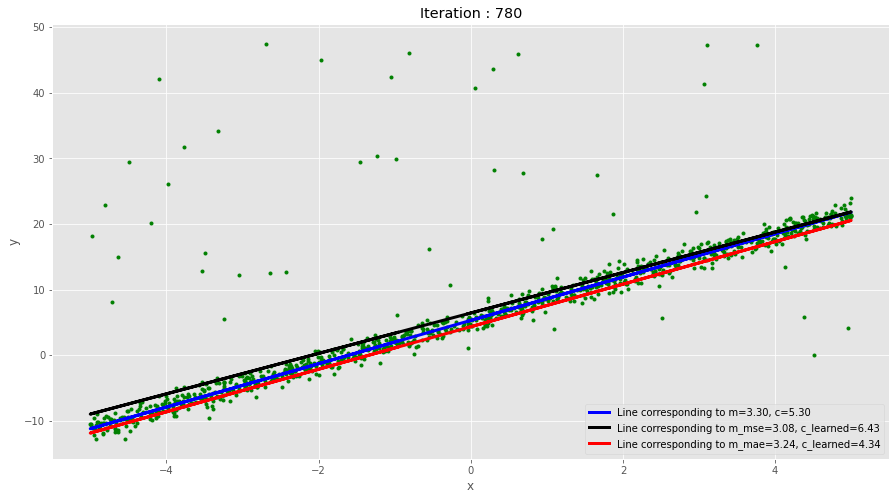

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 800, 
Loss_mse: 33.528, m_mse: 2.982, c_mse: 6.343
Loss_mae: 2.174, m_mae: 3.265,c_mae: 4.405


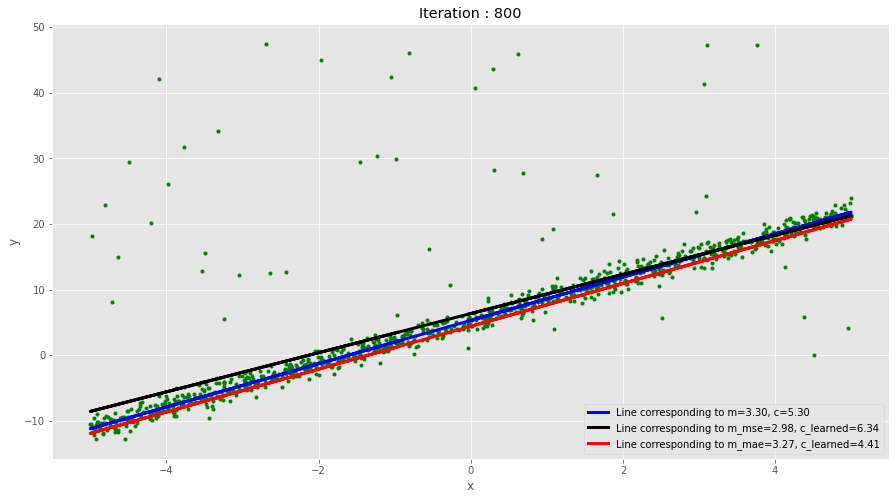

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 840, 
Loss_mse: 33.488, m_mse: 3.101, c_mse: 6.234
Loss_mae: 2.097, m_mae: 3.233,c_mae: 4.530


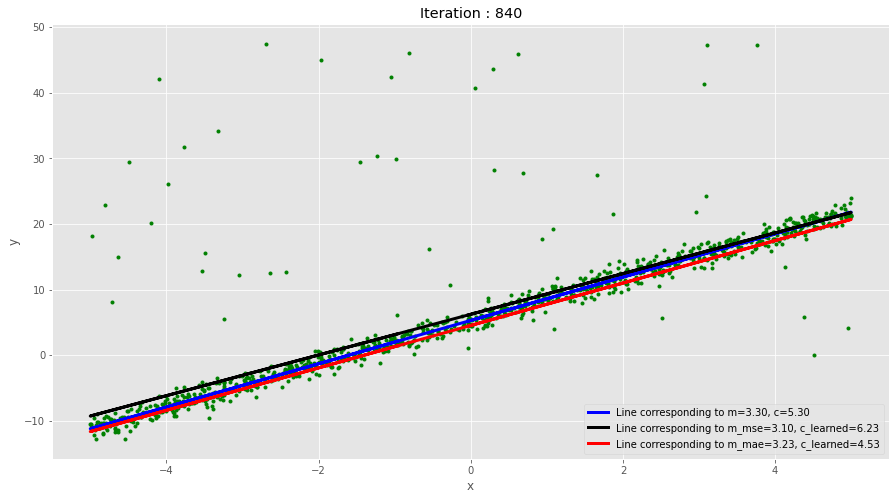

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 880, 
Loss_mse: 33.510, m_mse: 3.121, c_mse: 6.346
Loss_mae: 2.027, m_mae: 3.238,c_mae: 4.649


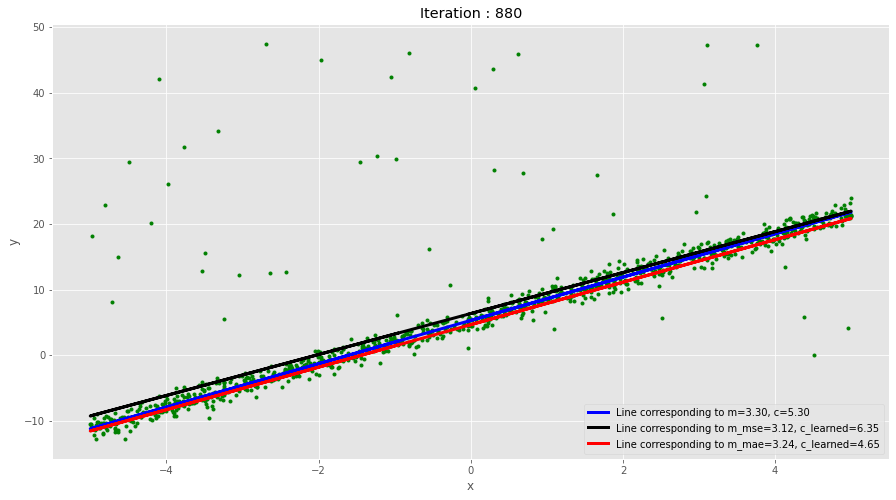

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 900, 
Loss_mse: 33.489, m_mse: 3.052, c_mse: 6.401
Loss_mae: 1.998, m_mae: 3.275,c_mae: 4.697


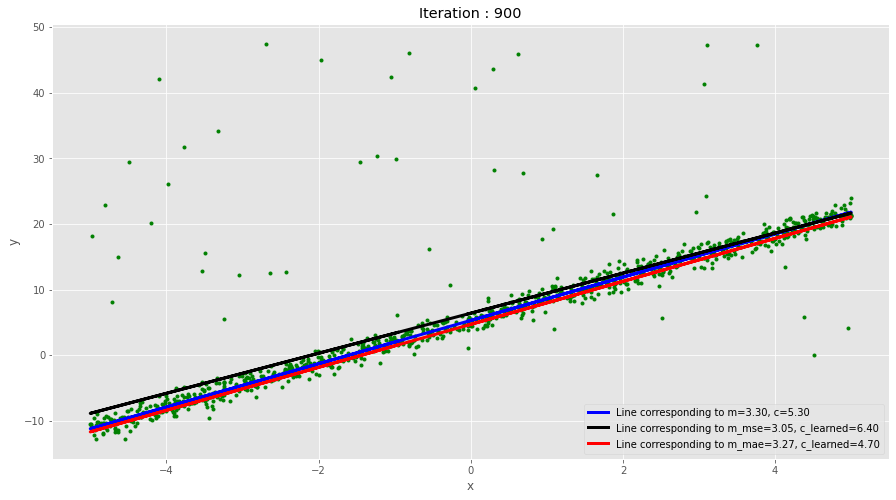

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 940, 
Loss_mse: 33.684, m_mse: 2.917, c_mse: 6.471
Loss_mae: 1.950, m_mae: 3.264,c_mae: 4.800


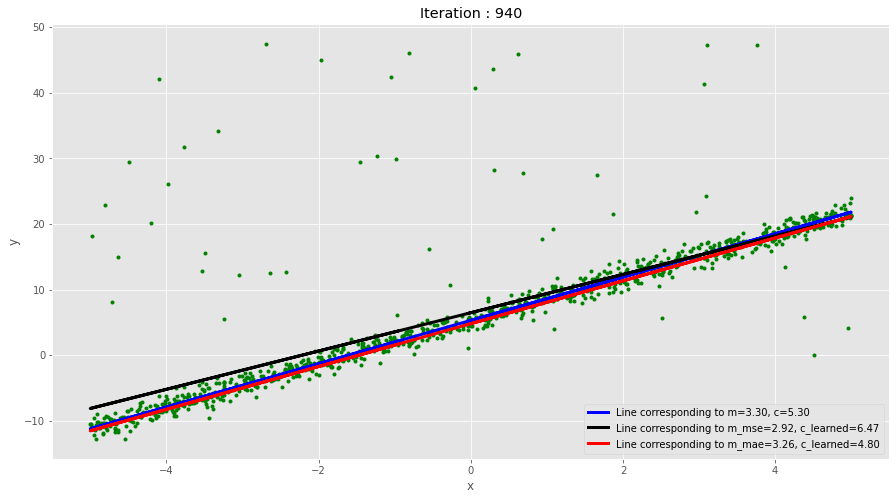

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 980, 
Loss_mse: 33.790, m_mse: 2.869, c_mse: 6.355
Loss_mae: 1.920, m_mae: 3.272,c_mae: 4.877


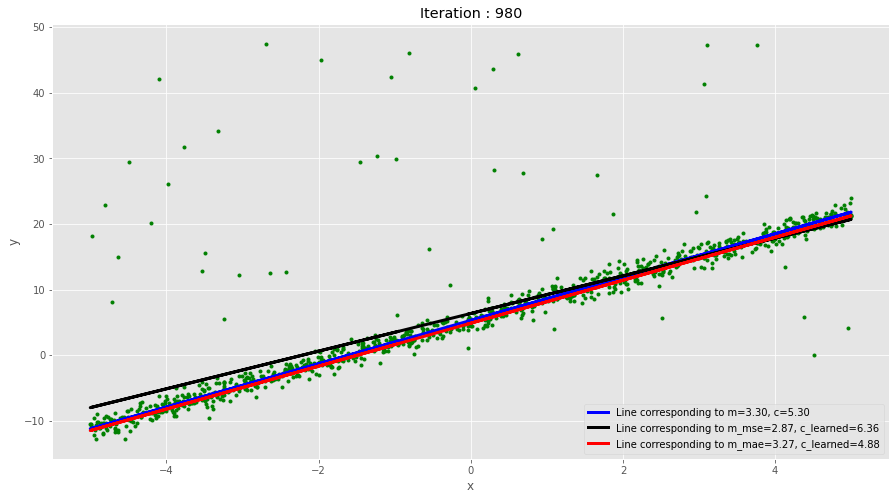

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1000, 
Loss_mse: 33.480, m_mse: 3.086, c_mse: 6.317
Loss_mae: 1.912, m_mae: 3.278,c_mae: 4.900


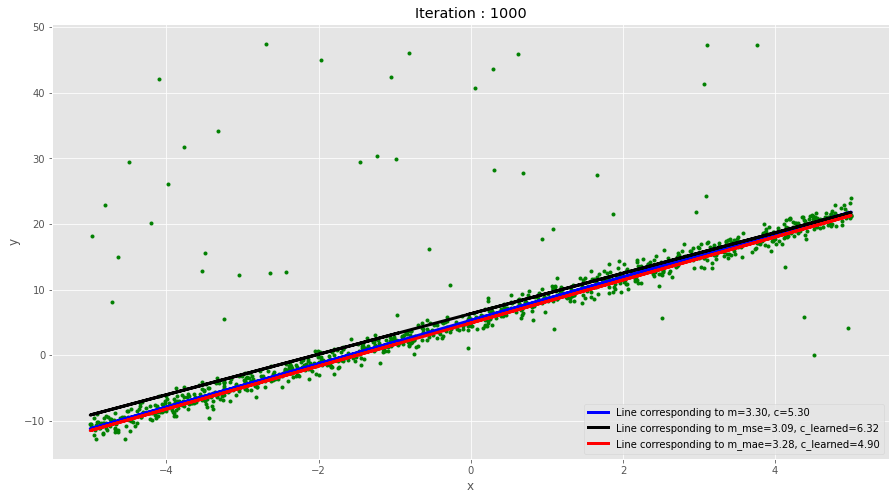

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1040, 
Loss_mse: 33.510, m_mse: 3.114, c_mse: 6.379
Loss_mae: 1.889, m_mae: 3.292,c_mae: 4.975


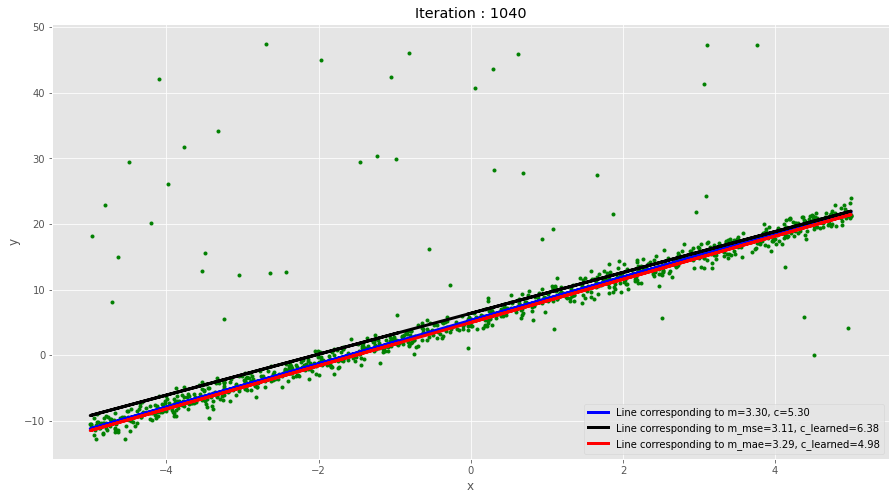

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1080, 
Loss_mse: 33.484, m_mse: 3.094, c_mse: 6.314
Loss_mae: 1.879, m_mae: 3.315,c_mae: 5.022


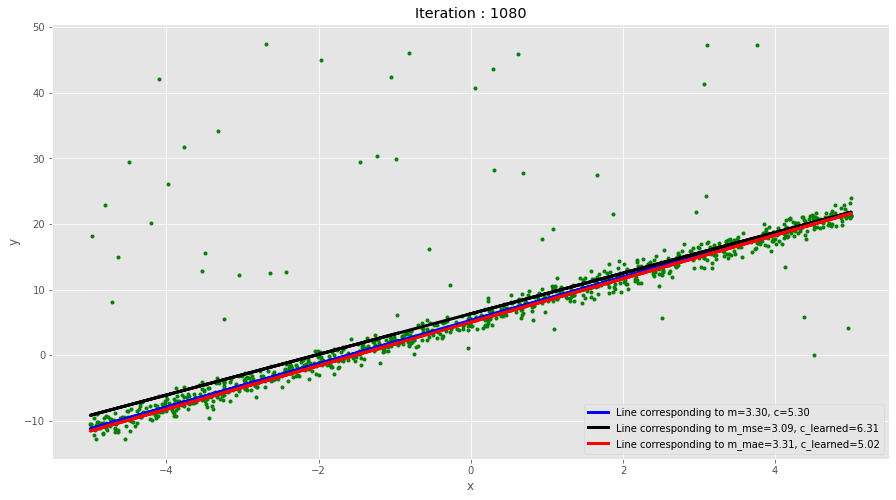

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1100, 
Loss_mse: 33.645, m_mse: 3.202, c_mse: 6.265
Loss_mae: 1.872, m_mae: 3.315,c_mae: 5.050


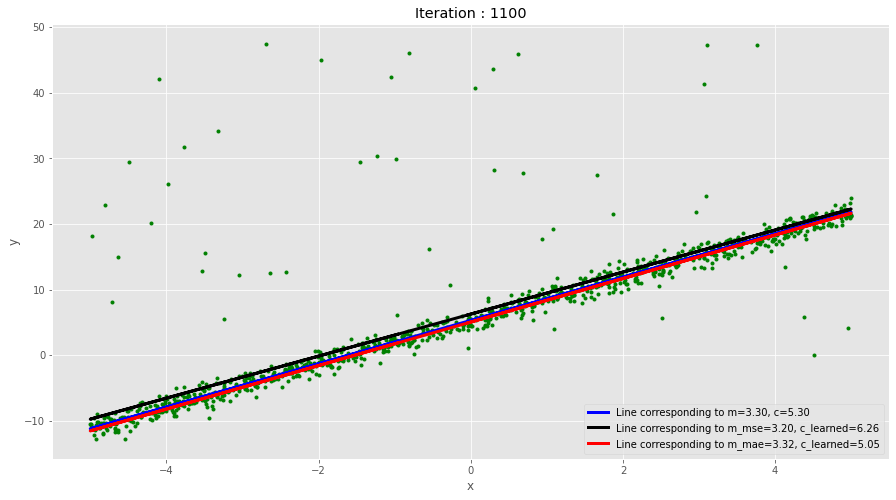

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1140, 
Loss_mse: 33.523, m_mse: 3.134, c_mse: 6.325
Loss_mae: 1.861, m_mae: 3.257,c_mae: 5.105


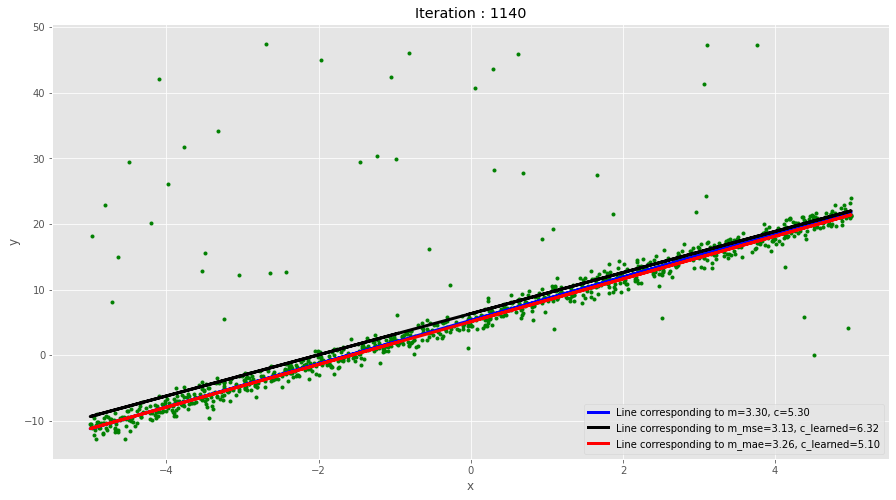

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1180, 
Loss_mse: 33.648, m_mse: 3.193, c_mse: 6.427
Loss_mae: 1.854, m_mae: 3.259,c_mae: 5.142


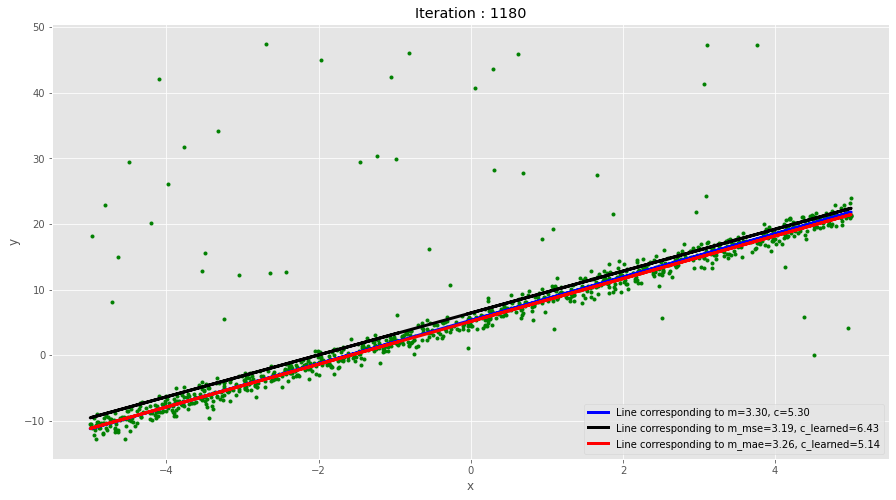

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1200, 
Loss_mse: 33.520, m_mse: 3.027, c_mse: 6.469
Loss_mae: 1.847, m_mae: 3.282,c_mae: 5.170


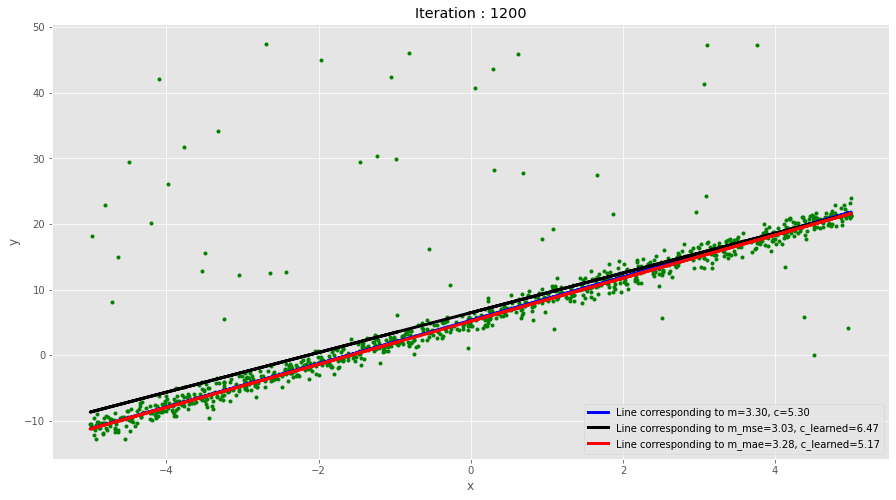

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1240, 
Loss_mse: 33.526, m_mse: 3.040, c_mse: 6.497
Loss_mae: 1.843, m_mae: 3.289,c_mae: 5.201


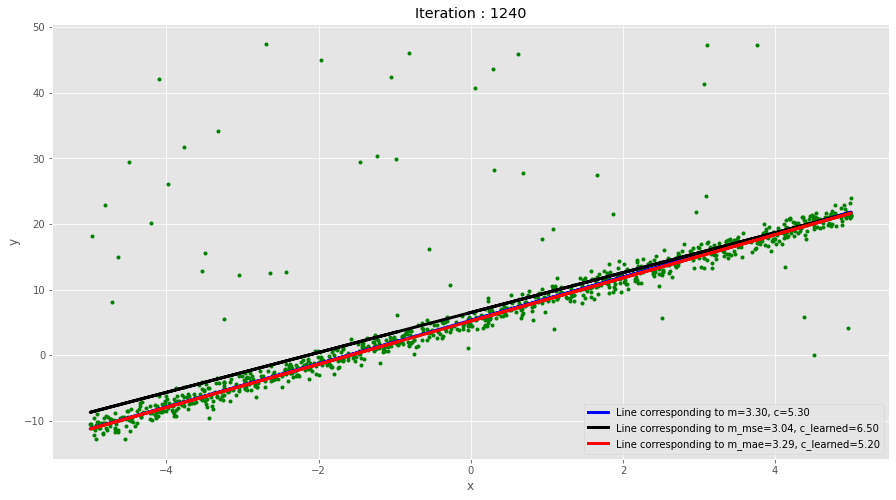

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1280, 
Loss_mse: 33.492, m_mse: 3.078, c_mse: 6.403
Loss_mae: 1.842, m_mae: 3.287,c_mae: 5.209


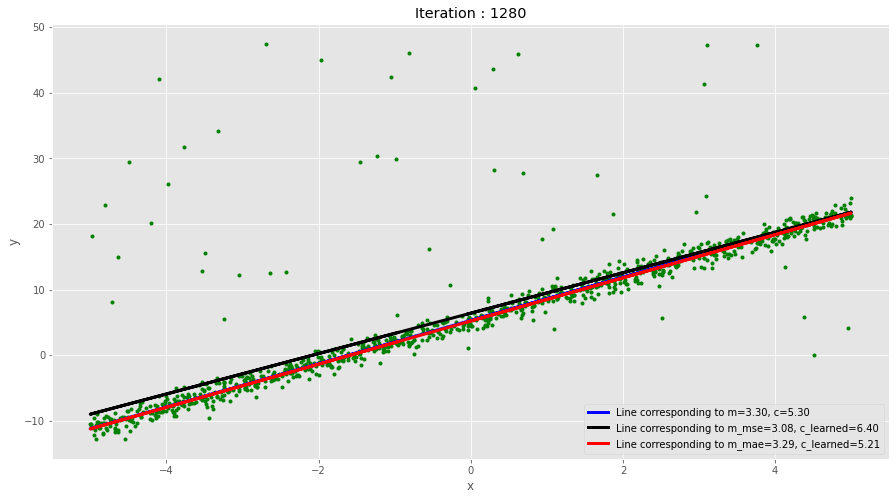

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1300, 
Loss_mse: 33.636, m_mse: 3.195, c_mse: 6.356
Loss_mae: 1.841, m_mae: 3.281,c_mae: 5.223


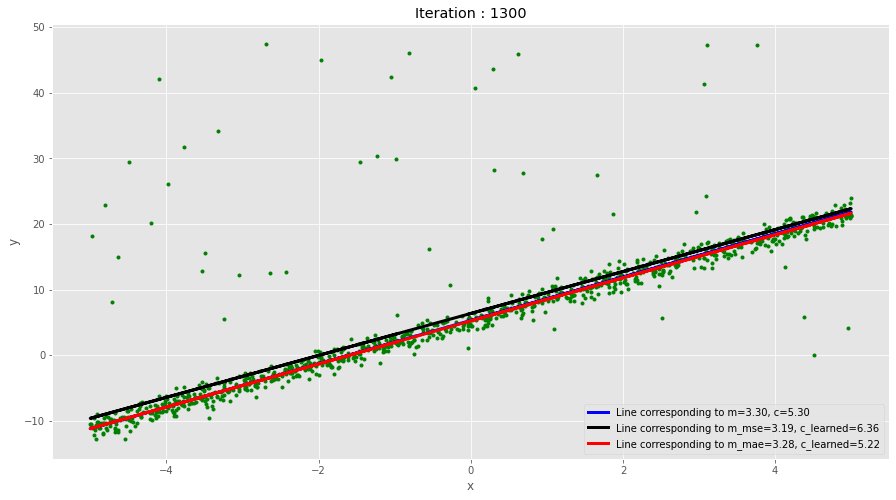

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1340, 
Loss_mse: 33.889, m_mse: 2.844, c_mse: 6.413
Loss_mae: 1.842, m_mae: 3.256,c_mae: 5.240


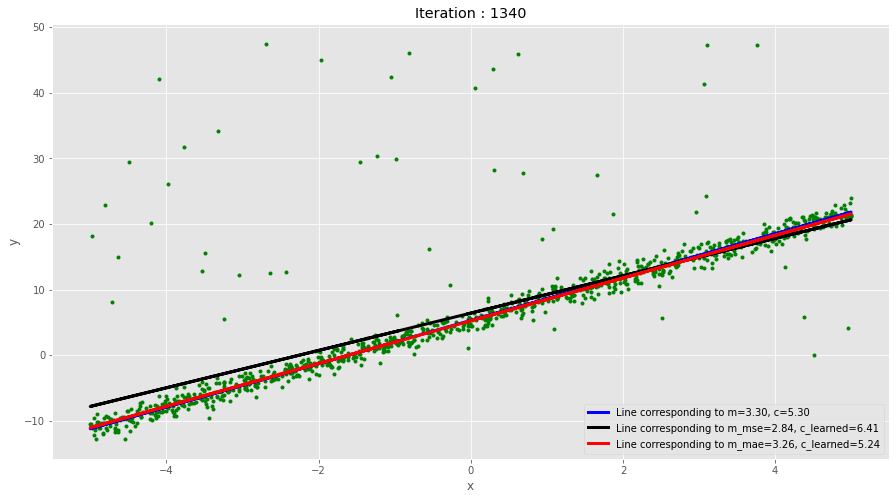

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1380, 
Loss_mse: 33.587, m_mse: 3.169, c_mse: 6.385
Loss_mae: 1.838, m_mae: 3.290,c_mae: 5.257


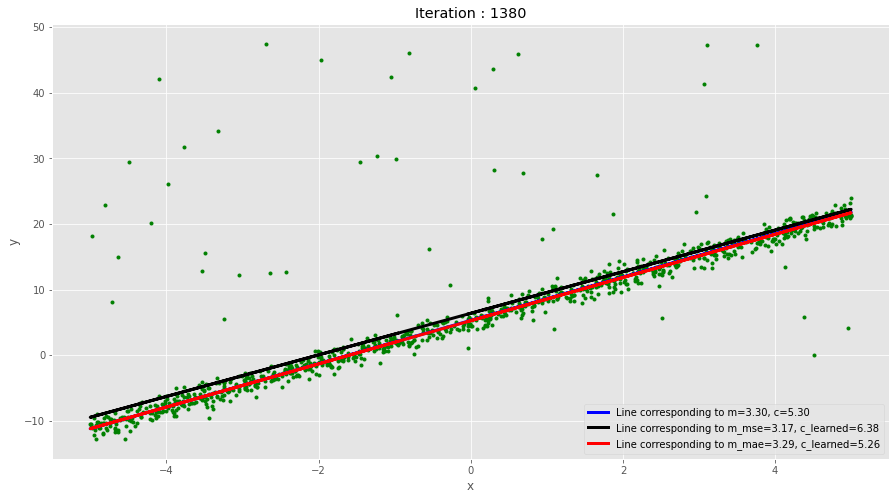

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1400, 
Loss_mse: 33.503, m_mse: 3.094, c_mse: 6.414
Loss_mae: 1.841, m_mae: 3.319,c_mae: 5.272


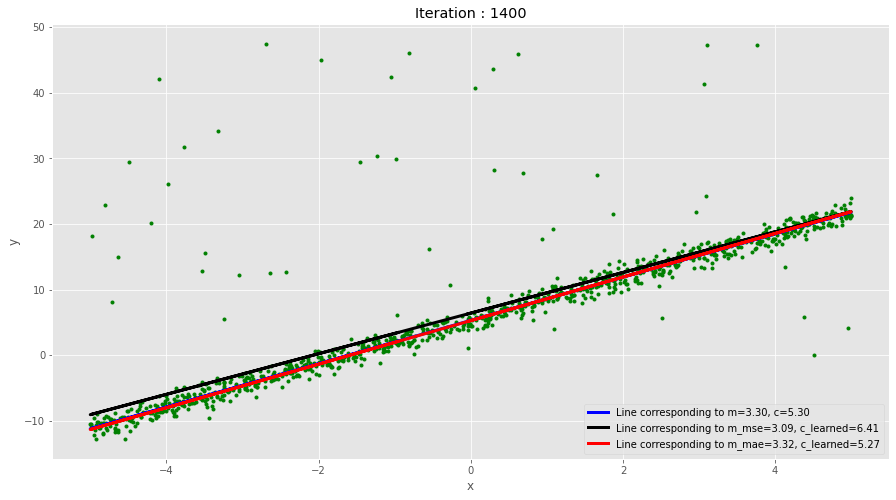

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1440, 
Loss_mse: 33.592, m_mse: 3.163, c_mse: 6.440
Loss_mae: 1.837, m_mae: 3.300,c_mae: 5.298


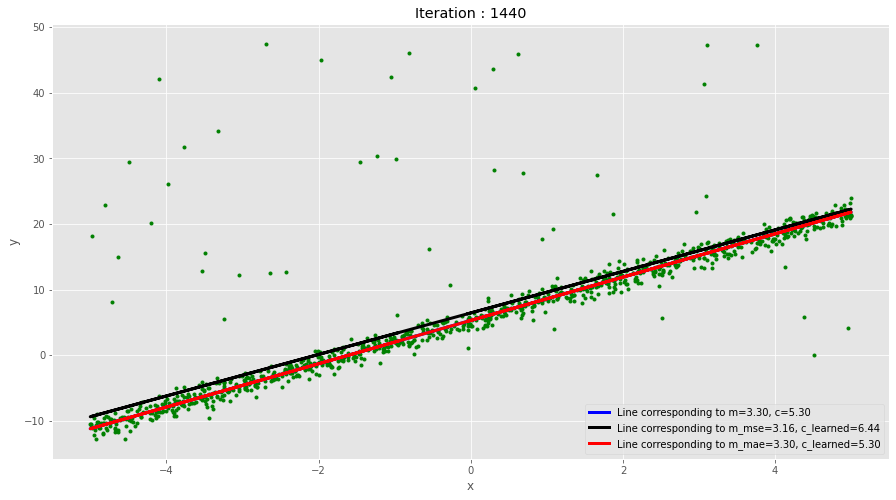

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1480, 
Loss_mse: 33.485, m_mse: 3.097, c_mse: 6.252
Loss_mae: 1.836, m_mae: 3.282,c_mae: 5.289


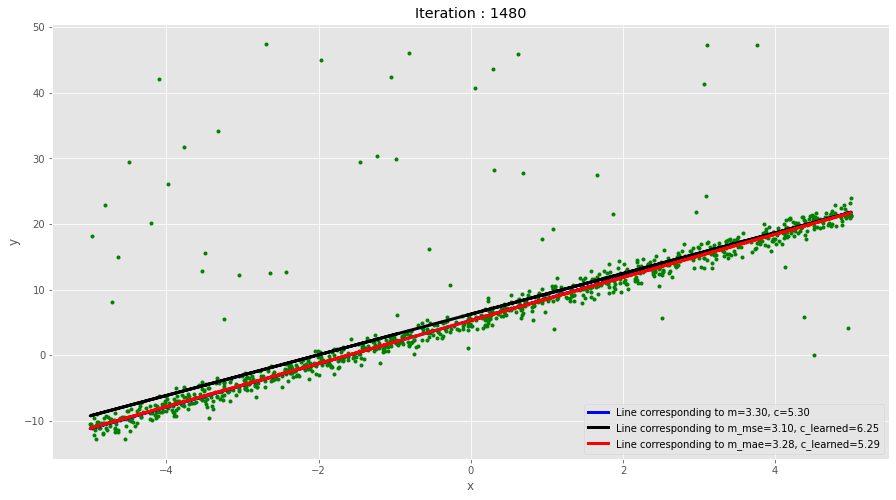

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1500, 
Loss_mse: 33.759, m_mse: 3.242, c_mse: 6.219
Loss_mae: 1.836, m_mae: 3.292,c_mae: 5.300


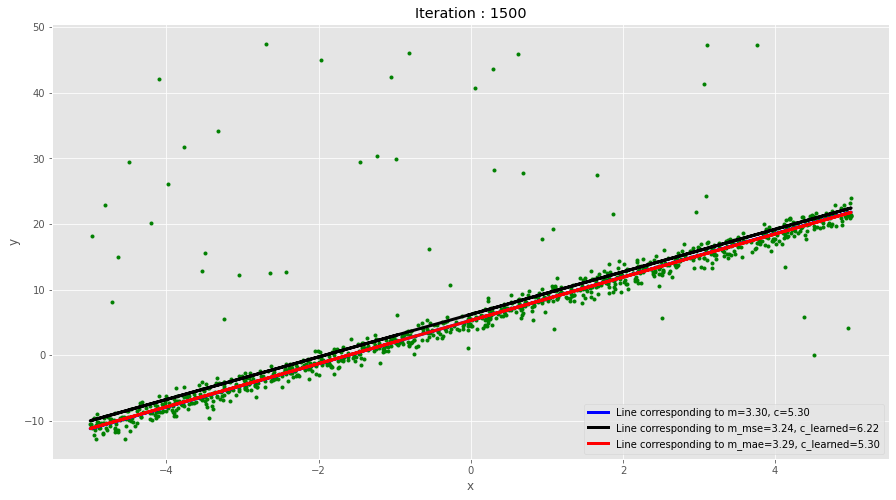

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1540, 
Loss_mse: 33.486, m_mse: 3.067, c_mse: 6.388
Loss_mae: 1.835, m_mae: 3.268,c_mae: 5.322


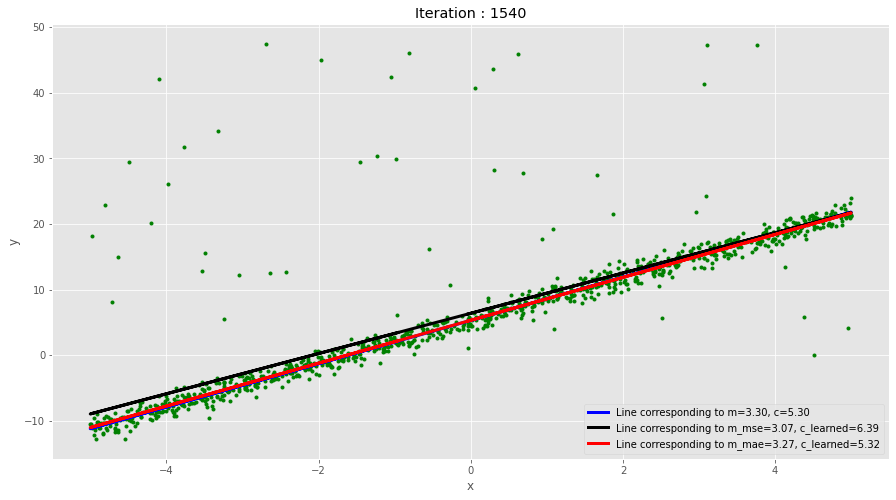

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1580, 
Loss_mse: 34.384, m_mse: 3.386, c_mse: 6.263
Loss_mae: 1.837, m_mae: 3.302,c_mae: 5.313


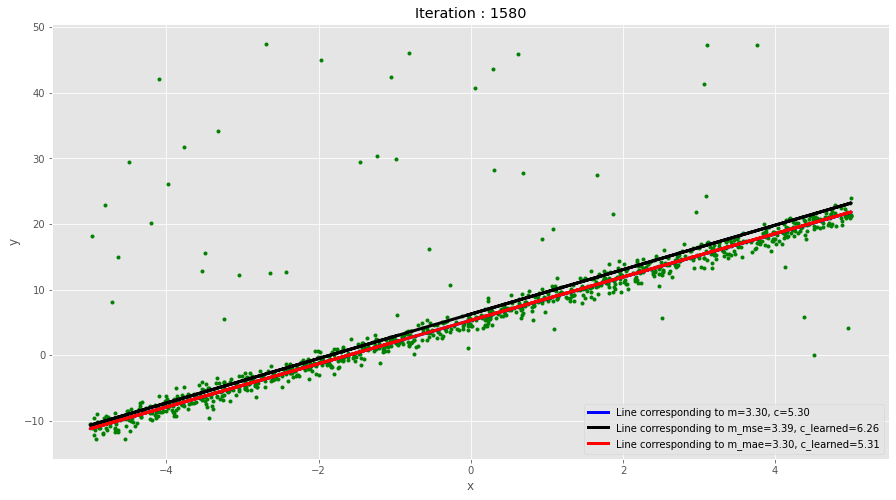

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1600, 
Loss_mse: 34.195, m_mse: 3.350, c_mse: 6.276
Loss_mae: 1.839, m_mae: 3.312,c_mae: 5.311


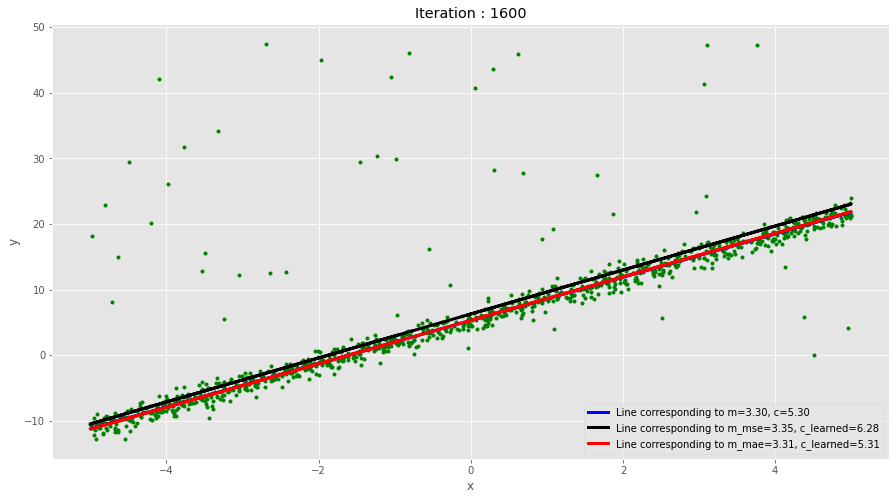

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1640, 
Loss_mse: 33.803, m_mse: 2.864, c_mse: 6.230
Loss_mae: 1.837, m_mae: 3.300,c_mae: 5.303


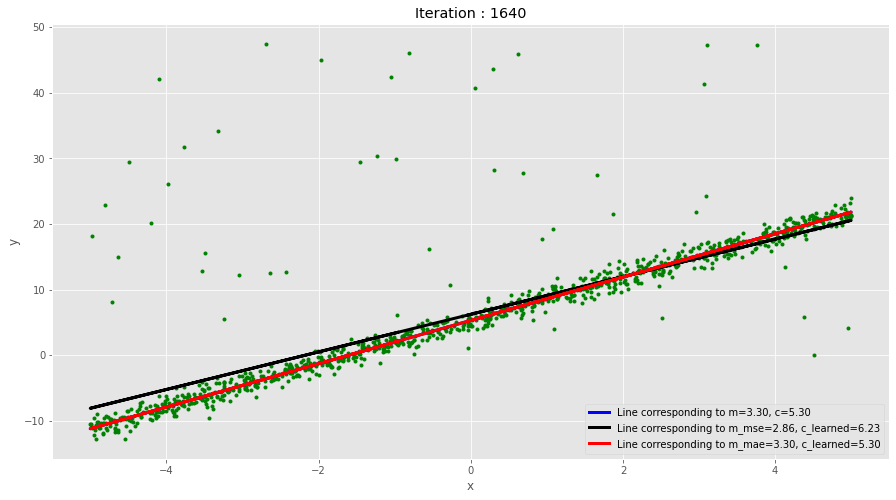

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1680, 
Loss_mse: 34.568, m_mse: 2.703, c_mse: 6.206
Loss_mae: 1.835, m_mae: 3.274,c_mae: 5.305


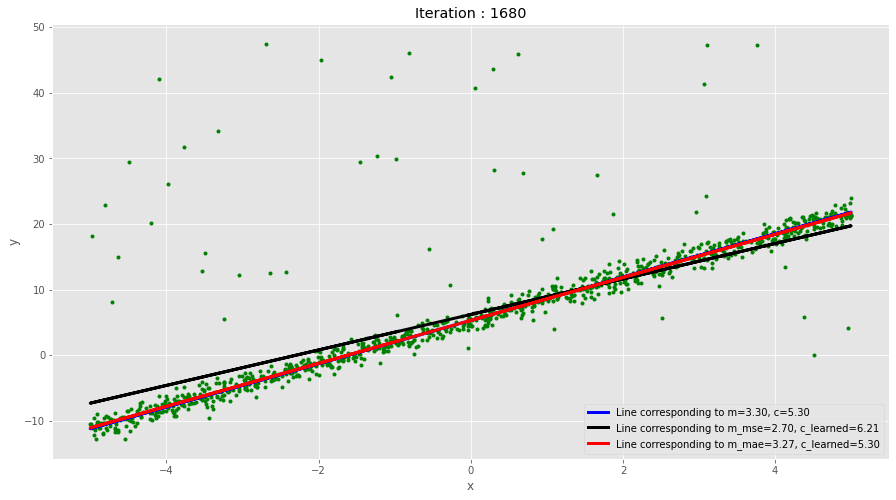

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1700, 
Loss_mse: 34.572, m_mse: 2.703, c_mse: 6.367
Loss_mae: 1.835, m_mae: 3.270,c_mae: 5.316


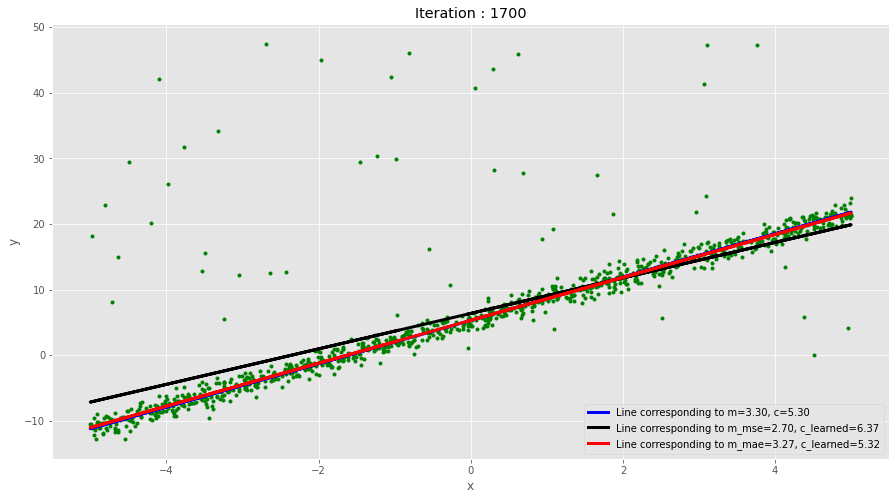

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1740, 
Loss_mse: 33.760, m_mse: 3.240, c_mse: 6.363
Loss_mae: 1.838, m_mae: 3.309,c_mae: 5.323


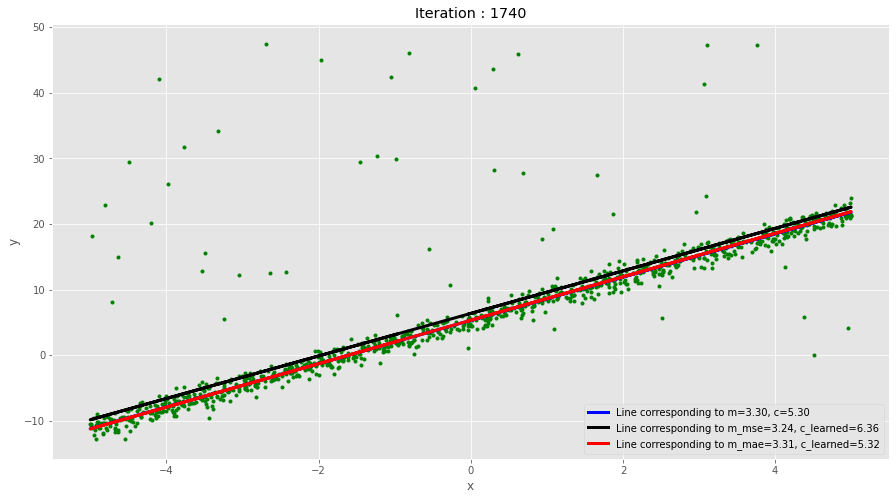

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1780, 
Loss_mse: 33.488, m_mse: 3.099, c_mse: 6.234
Loss_mae: 1.836, m_mae: 3.257,c_mae: 5.318


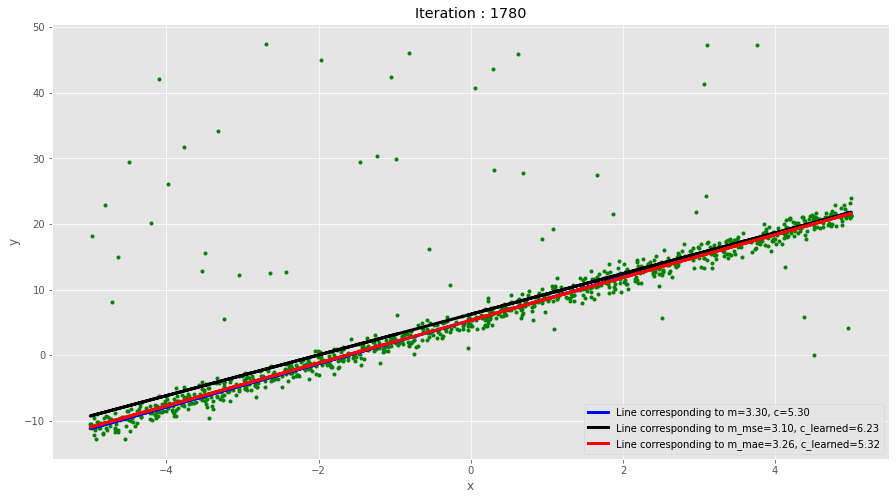

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1800, 
Loss_mse: 33.516, m_mse: 3.129, c_mse: 6.223
Loss_mae: 1.835, m_mae: 3.266,c_mae: 5.315


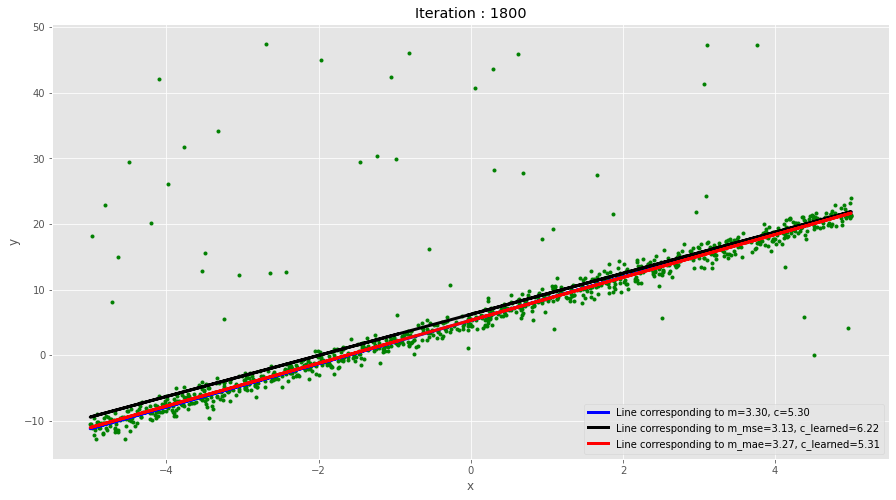

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1840, 
Loss_mse: 33.674, m_mse: 2.907, c_mse: 6.235
Loss_mae: 1.838, m_mae: 3.248,c_mae: 5.330


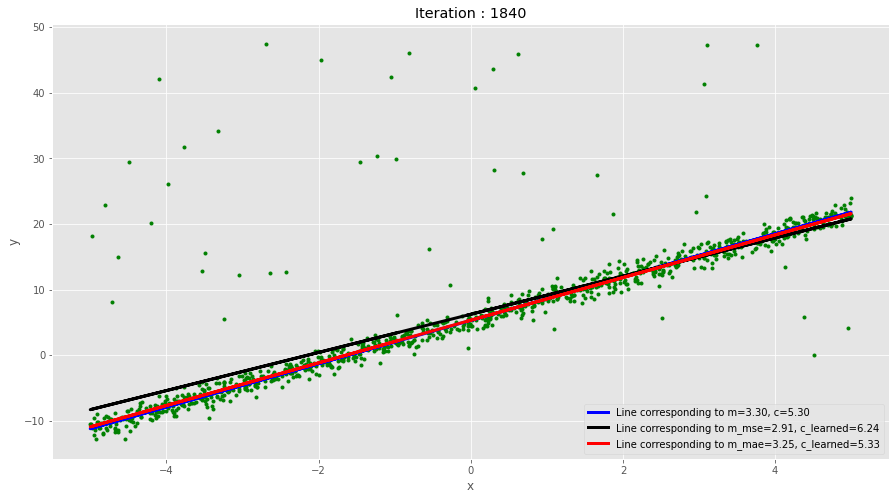

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1880, 
Loss_mse: 33.597, m_mse: 2.959, c_mse: 6.080
Loss_mae: 1.835, m_mae: 3.269,c_mae: 5.312


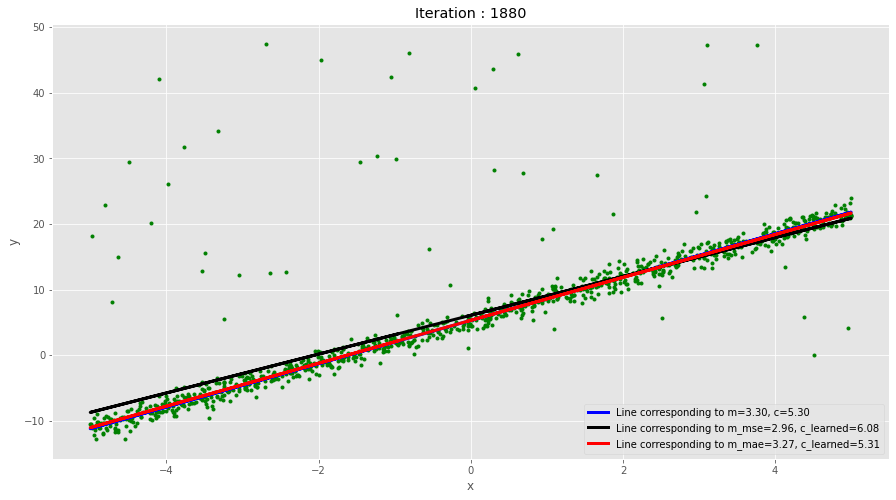

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1900, 
Loss_mse: 33.523, m_mse: 3.018, c_mse: 6.083
Loss_mae: 1.835, m_mae: 3.275,c_mae: 5.325


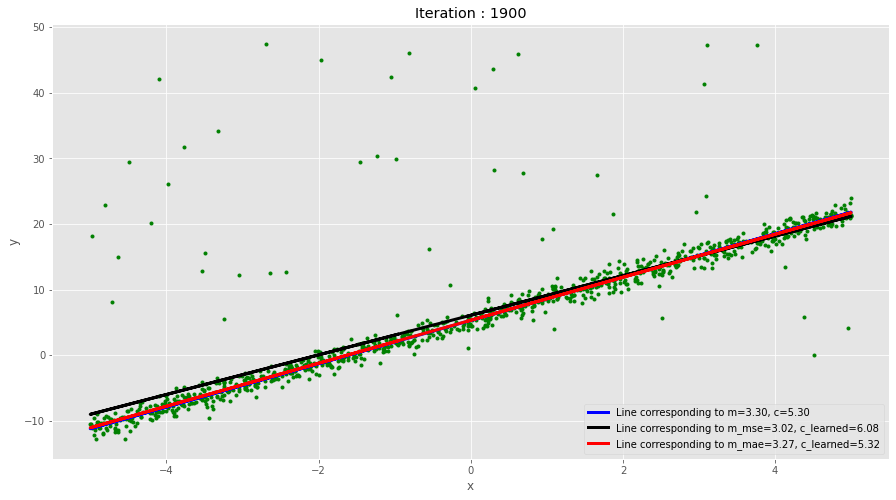

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1940, 
Loss_mse: 33.490, m_mse: 3.060, c_mse: 6.141
Loss_mae: 1.835, m_mae: 3.286,c_mae: 5.319


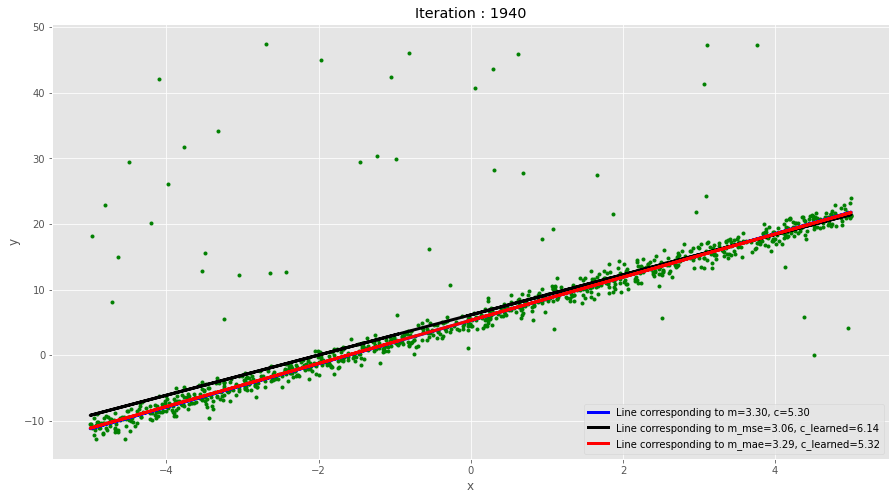

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Iteration: 1980, 
Loss_mse: 33.504, m_mse: 3.112, c_mse: 6.183
Loss_mae: 1.836, m_mae: 3.300,c_mae: 5.323


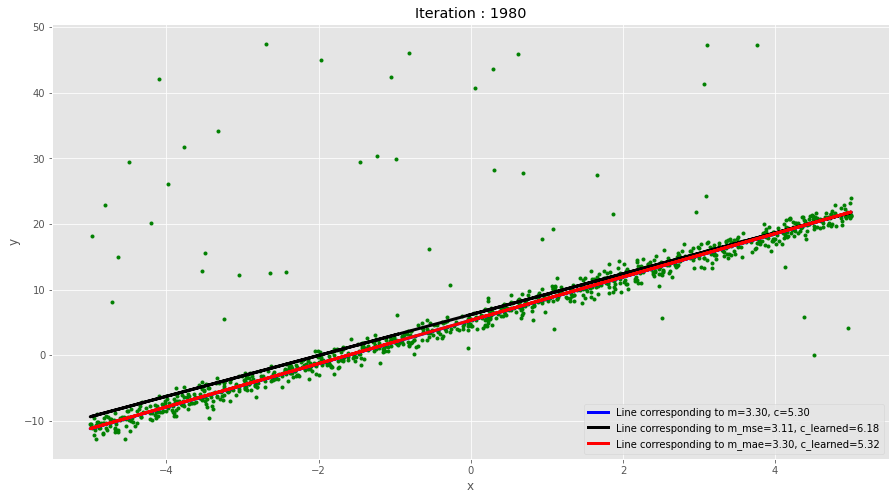

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [28]:
# inputs
inputs = x

# output/labels
labels = y_label

# labels around y
labels_origin = y

# epoch 
epoch=20

# learning rate
lr = 0.005

# batch size
batch_size=10

# dislpay plot count
display_count=40

# inital m
initial_m = 2

# initail c
initial_c = 1

grad_fun_m_c_list = [gradient_wrt_m_and_c_mse, gradient_wrt_m_and_c_mae]

loss_fun_list = [MSE_loss, MAE_loss]

m, c, loss, final_iteration = train(inputs, labels, labels_origin, initial_m, initial_c, grad_fun_m_c_list, 
                                    loss_fun_list, lr, batch_size, epoch, display_count)

--------------------------
Final plots
--------------------------
Iteration: 1999, 
Loss_mse: 33.664, m_mse: 3.195, c_mse: 6.087
Loss_mae: 1.835, m_mae: 3.278,c_mae: 5.316


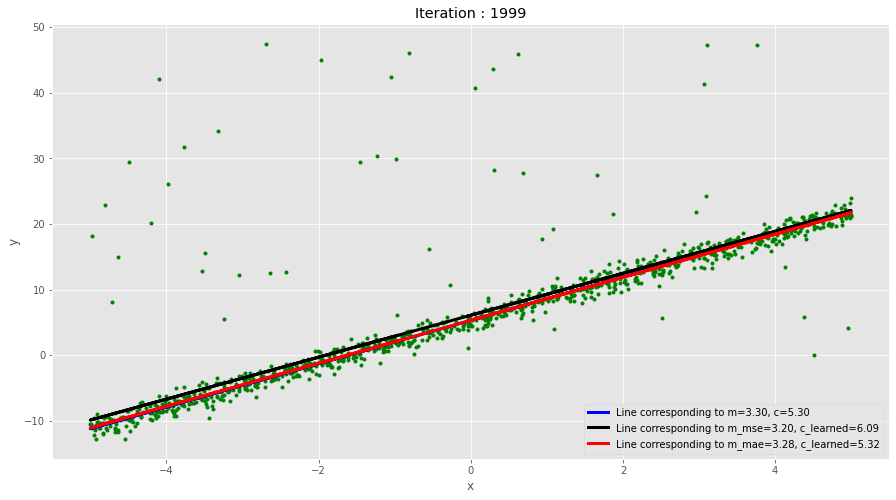

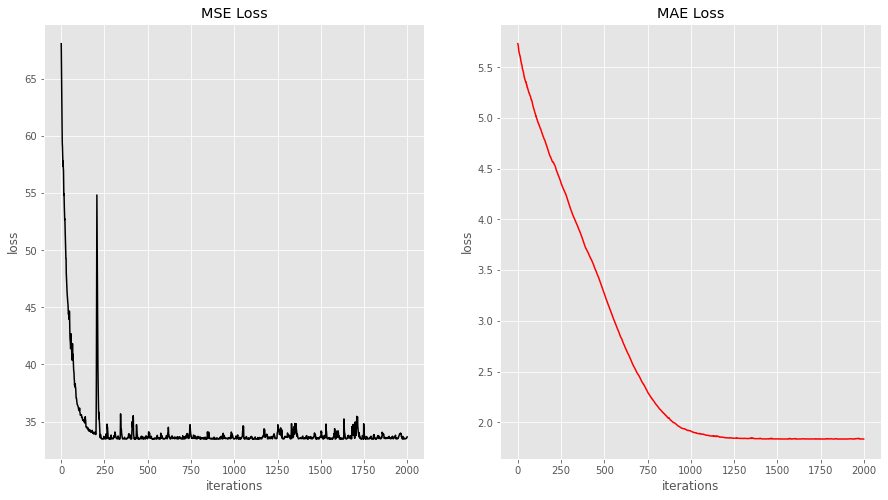

In [29]:
print('{0}\nFinal plots\n{0}'.format('--------------------------'))

display_training(inputs, labels_origin, labels, loss, m, c, iteration=final_iteration)

plot_loss(loss)


**In the above plot, we can observe that the line learned with mean square error deviated more compare to mean absolute error.**